# Исследование интернет-магазина «Стримчик»

<a id="Начало_проекта"></a>

<div style="border:solid black 2px; padding: 20px">

На данных интернет-магазина «Стримчик» проведем исследовательский анализ и проверим выдвинутые гипотезы.

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Данные до 2016 года (данные за 2016 год могут быть неполными). Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

**Цель исследования** 
1. Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
2. Составить портрет пользователя каждого региона.
3. Проверить гипотезы ниже:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Данные о поведении пользователей получили из файла `/datasets/games.csv`. О качестве данных нам ничего не известно. Поэтому перед проверкой гипотез проведем обзор данных. 

Таким образом, исследование пройдёт в 6 этапов:
1. [Загрузка и обзор данных](#Загрузка_и_обзор_данных)
2. [Предобработка данных](#Предобработка_данных)
3. [Исследовательский анализ данных](#Исследовательский_анализ_данных)
4. [Составим портрет пользователя каждого региона](#Портрет_пользователя_каждого_региона)
5. [Проверка гипотез](#Проверка_гипотез)
6. [Итоги исследования](#Итоги_исследования)


**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

</div>

[Начало проекта](#Начало_проекта)

<a id="Загрузка_и_обзор_данных"></a>

## Загрузка и обзор данных

<div style="border:solid black 2px; padding: 20px">

**Шаг 1.** Импортируем библиотеки. Считываем данные из csv-файла в датафрейм и сохраняем в переменную data.

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats as st
import math
import seaborn
import missingno as msno

In [2]:
data = pd.read_csv('games.csv') # чтение файла с данными и сохранение в data

<div style="border:solid black 2px; padding: 20px">

**Шаг 2.** Выведем первые 5 строк датафрейма на экран.

</div>

In [3]:
data.head() # получение первых строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div style="border:solid black 2px; padding: 20px">

**Шаг 3.** Получим общую информацию о таблице.

</div>

In [4]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid black 2px; padding: 20px">

**Шаг 4.** Получим стандартное отклонение и другие характеристики таблицы.

</div>

In [5]:
data.describe().T # просмотр основных статистических данных

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<div style="border:solid black 2px; padding: 20px">
    
**Шаг 5.** Построим гистограмму для всех числовых столбцов таблицы на одном графике.

</div>

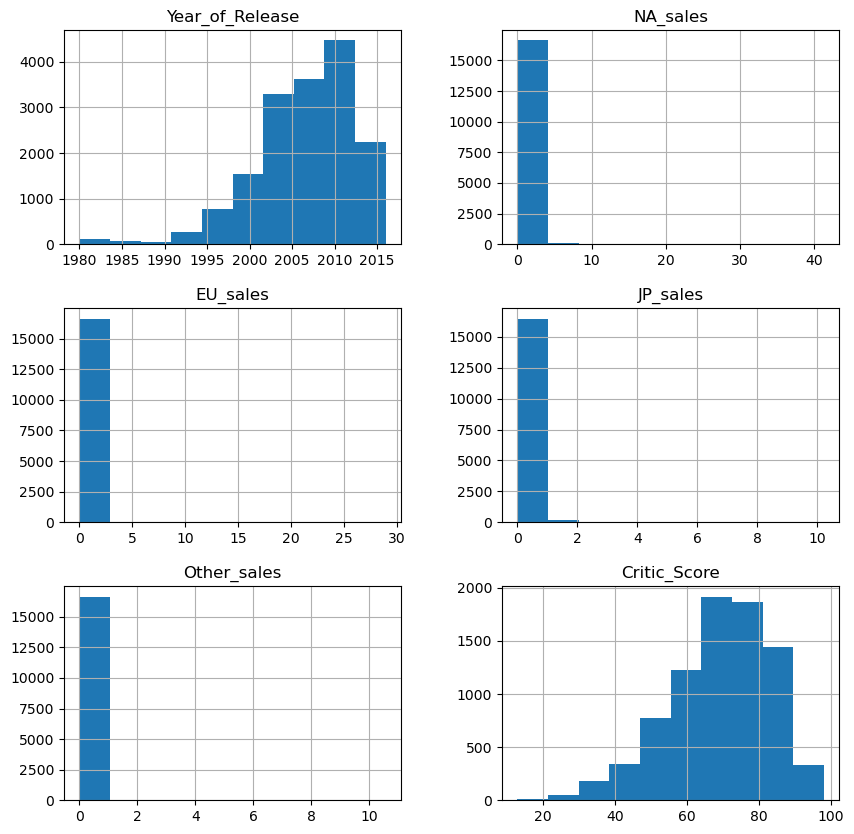

In [6]:
data.hist(figsize=(10, 10)) # строим гистограмму
plt.show()

<div style="border:solid green 2px; padding: 20px">

В предобработке данных рассмотреть комментарии ниже:
* Заменить названия столбцов (привести к нижнему регистру).
* User_Score: Dtype object. Изменить Dtype на float. Аналогично столбцу 'critic_score'.
* Year_of_Release: Dtype float64. Изменить Dtype на int. Год - это целое число.
* Обработка пропусков (пропуски в 6 столбцах при проверке info).
* Мало данных по играм с годом выпуска до 1995. Учитывать при анализе.
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

</div>

[Начало проекта](#Начало_проекта)

<a id="Предобработка_данных"></a>

## Предобработка данных

### Переименование столбцов

<div style="border:solid black 2px; padding: 20px">

Приведем названия столбцов в соответствие с хорошим стилем. 

</div>

In [7]:
data.columns = data.columns.str.lower() # все символы делаем строчными

In [8]:
data.columns # проверяем названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Сумма продаж по всем регионам

<div style="border:solid black 2px; padding: 20px">

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
Сделаем это раньше проверки пропусков, чтобы в пункте с проверкой пропусков оценивать долю продаж пропущенных значений в случае необходимости.

</div>

In [9]:
# добавляем столбец с общей суммой продаж
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)

In [10]:
data.head() # получение первых строк

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Обработка пропущенных значений

#### Проверка столбцов с пропусками

<div style="border:solid black 2px; padding: 20px">

Выведем данные пропущенных значений для каждого столбца.

</div>

In [11]:
data.isnull().mean() * 100 # проверяем наличие и долю пропусков

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
total_sales         0.000000
dtype: float64

In [12]:
data.isna().sum() # подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

<Axes: >

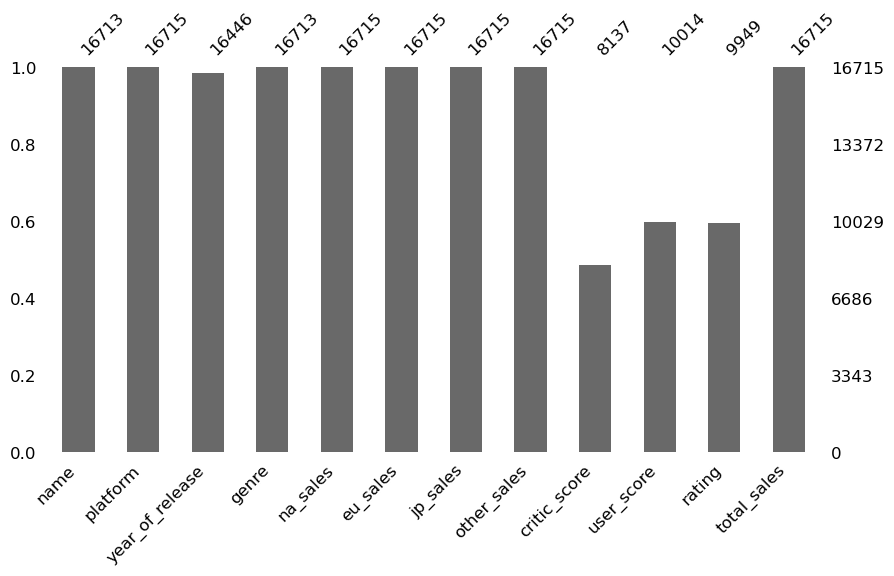

In [13]:
msno.bar(data, figsize = (10,5), fontsize = 12)

<div style="border:solid green 2px; padding: 20px">

Пропуски в исходных данных могут появиться разными путями. попробуем понять, с какими случаями мы столкнулись:
* Системная ошибка при автоматической обработке информации. В столбцах 'name' и 'genre' есть пропуски в 2х строках. Предполагаем, что эти поля являются обязательными для заполнения, соответственно могла быть системная ошибка при выгрузке данных. Так как таких строк немного, удалим их.
* Системная ошибка при автоматической обработке информации или умышленный пропуск при заполнении. В столбце 'year_of_release' есть пропуски в 269 строках. Если поле было необязательное к заполнению, то могли умышленно пропустить, но нельзя в данном случае исключать и системную ошибку. Невозможно заменить на некое адекватное 'среднее' значение. Доля строк с пропусками в year_of_release 1.6%. Так как такая доля несущественна для будущего анализа, также удалим эти строки.
* Отсутствие информации как таковой. В столбцах 'critic_score', 'user_score', 'rating' пропуски занимают долю 40-51% от всех строк. Это очень большая доля. Удалять нельзя. В пунктах ниже в зависимости от информации в данных столбцах рассмотрим или замену пропусков на некое значение или оставим как есть.

</div>

#### Удаление строк с пропусками

<div style="border:solid black 2px; padding: 20px">

Удалим строки с пропусками в столбцах 'name', 'genre', 'year_of_release'.

</div>

In [14]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

#### Пропуски в столбцах с оценками и рейтингом

<div style="border:solid black 2px; padding: 20px">

Доля пропусков:
* 'critic_score' 51.3%
* 'user_score' 40.1%
* 'rating' 40.5%

Как писали выше, удалить данные строки не можем. Разберем состав столбцов и рассмотрим замену или игнорирование пропусков.

</div>

In [15]:
data['critic_score'].sort_values().unique() # выведем перечень уникальных значений столбца

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [16]:
data['user_score'].sort_values().unique() # выведем перечень уникальных значений столбца

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [17]:
data['rating'].sort_values().unique() # выведем перечень уникальных значений столбца

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

<div style="border:solid black 2px; padding: 20px">

* Невозможно заменить на некое адекватное 'среднее' значение.
* В оценке пользователей есть значение 0, соответственно на 0 заменить не можем.
* Большая доля, чтобы терять данные по этим параметрам.

Оставляем как есть.

</div>

#### Значение 'tbd' в столбце 'user_score'

<div style="border:solid black 2px; padding: 20px">

Также увидели в столбце 'user_score' значение 'tbd'.
Проверим строки, где есть данное значение и что оно означает.

</div>

In [18]:
# проверим количество строк с нестандартным обозначением рейтинга
data.query('user_score == "tbd"')['user_score'].value_counts()

user_score
tbd    2376
Name: count, dtype: int64

In [19]:
data.shape # размер таблицы

(16444, 12)

In [20]:
# доля продаж tbd
data.query('user_score == "tbd"')['total_sales'].sum() /  data['total_sales'].sum() * 100

5.065024499765724

<div style="border:solid black 2px; padding: 20px">

Строк с оценкой пользователей 'tbd' 2424 из 16713 (почти 14.5%).

Продажи игр, где оценка пользователей 'tbd', составляют 5% от общих продаж всех регионов.

Таким образом понимаем, что строки, где оценка пользователей 'tbd', мы удалить не можем.

[TDB в стиме](https://steamcommunity.com/discussions/forum/26/3937895063007873574/)
> TDB — To Be Determined, т.е. "Будет определено". Когда разработчик той или иной игры уже сделал анонс о том, что игра готовится к выходу, но пока ещё не может назвать точную дату выхода игры, именно это сокращение и используется в анонсах компьютерных игр в графе "Дата выхода", но порой данное сокращение можно увидеть и в графе системных требований к игре.

В нашем случае можно предположить, что оценка в этих строках не определена. Мы не может заменить просто на 0, так как строки с оценкой 0 также присутсвуют в таблице. Заменим на 'nan'.

</div>

In [21]:
# если не выполняется условие в первом параметре, то значение заменяется на новое
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', np.nan)

In [22]:
data['user_score'].sort_values().unique() # выведем перечень уникальных значений столбца

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [23]:
data.isna().sum() # подсчёт пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

<div style="border:solid green 2px; padding: 20px">
    
Удалили пропуски во всех столбцах кроме:
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB

</div>

### Изменение типов данных

In [24]:
data.dtypes # определим тип данных

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
total_sales        float64
dtype: object

<div style="border:solid black 2px; padding: 20px">

User_Score: Dtype object. Изменить Dtype на float. Аналогично столбцу 'critic_score'.

</div>

In [25]:
data['user_score'] = data['user_score'].astype(float) # меняем тип данных

<div style="border:solid black 2px; padding: 20px">

Year_of_Release: Dtype float64. Изменить Dtype на int. Год - это целое число.

</div>

In [26]:
data['year_of_release'].sort_values().unique() # выведем перечень уникальных значений столбца

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

In [27]:
data['year_of_release'] = data['year_of_release'].astype(np.int32)

In [28]:
data.dtypes # проверяем типы данных после изменений

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

<div style="border:solid green 2px; padding: 20px">

Преобразовали типы данных в столбцах.

</div>

### Обработка дубликатов

<div style="border:solid black 2px; padding: 20px">
    
**Шаг 1.** Посчитаем явные дубликаты в таблице.

</div>

In [29]:
data.duplicated().sum() # проверка на отсутствие явных дубликатов

0

<div style="border:solid green 2px; padding: 20px">

В данной таблице нет явных дубликатов.

</div>

<div style="border:solid black 2px; padding: 20px">
    
**Шаг 2.** Проверка неявных дубликатов.

</div>

In [30]:
data['name'].sort_values().unique() # просмотр уникальных отсортированных названий

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'uDraw Studio', 'uDraw Studio: Instant Artist',
       '¡Shin Chan Flipa en colores!'], dtype=object)

In [31]:
len(data['name'].sort_values().unique()) # выведем количество уникальных значений столбца

11426

In [32]:
data['platform'].sort_values().unique() # просмотр уникальных отсортированных названий

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [33]:
len(data['platform'].sort_values().unique()) # выведем количество уникальных значений столбца

31

In [34]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

<div style="border:solid green 2px; padding: 20px">

В столбцах 'platform' и 'genre' нет очевидных на первый взгляд неявных дубликатов.

В столбце 'name' 11426 уникальных значений, на данном этапе нет причин искать дубликаты в таком количестве строк.

</div>

### Категоризация данных

<div style="border:solid black 2px; padding: 20px">

Чтобы было удобно анализировать данные и выводить читабельные сводные таблицы, сделаем категоризацию данных в столбцах ниже:
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB
* Genre — жанр игры

И добавим столбец с названием магазина 'Интернет-магазин Стримчик'.

</div>

#### Добавление столбца с названием магазина 'Интернет-магазин Стримчик'

In [35]:
# добавим столбец, чтобы строить сводные по разным столбцам
data['store'] = 'Интернет-магазин Стримчик'

In [36]:
# выведем первые 5 строк
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,store
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Интернет-магазин Стримчик
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Интернет-магазин Стримчик
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Интернет-магазин Стримчик
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Интернет-магазин Стримчик
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Интернет-магазин Стримчик


#### Категоризация critic_score — оценка критиков

<div style="border:solid black 2px; padding: 20px">

Critic_Score — оценка критиков (максимум 100).

Сделаем категории по 10бальной шкале. Пропускам присвоим 'нет оценки'.

</div>

In [37]:
# функция возвращает категорию по значению от critic_score, используя правила:
def type_critic_score(row): 
    if row['critic_score'] < 10:
        return '1. от 1 до 9'
    elif row['critic_score'] < 20:
        return '2. от 10 до 19'
    elif row['critic_score'] < 30:
        return '3. от 20 до 29'
    elif row['critic_score'] < 40:
        return '4. от 30 до 39'
    elif row['critic_score'] < 50:
        return '5. от 40 до 49'
    elif row['critic_score'] < 60:
        return '6. от 50 до 59'
    elif row['critic_score'] < 70:
        return '7. от 60 до 69'
    elif row['critic_score'] < 80:
        return '8. от 70 до 79'
    elif row['critic_score'] < 90:
        return '9. от 80 до 89'
    elif row['critic_score'] <= 100:
        return '10. от 90 до 100'
    return 'нет оценки'

data['critic_score_type'] = data.apply(type_critic_score, axis=1) # добавляем новый столбец

In [38]:
data['critic_score_type'].value_counts()

critic_score_type
нет оценки          8461
8. от 70 до 79      2316
7. от 60 до 69      1821
9. от 80 до 89      1652
6. от 50 до 59      1084
5. от 40 до 49       505
10. от 90 до 100     327
4. от 30 до 39       219
3. от 20 до 29        51
2. от 10 до 19         8
Name: count, dtype: int64

#### Категоризация user_score — оценка пользователей

<div style="border:solid black 2px; padding: 20px">

User_Score — оценка пользователей (максимум 10).

Сделаем категории от 1 до 10. Пропускам присвоим 'нет оценки'.

</div>

In [39]:
# функция возвращает категорию по значению от user_score, используя правила:
def type_user_score(row): 
    if row['user_score'] <= 1:
        return '1'
    elif row['user_score'] <= 2:
        return '2'
    elif row['user_score'] <= 3:
        return '3'
    elif row['user_score'] <= 4:
        return '4'
    elif row['user_score'] <= 5:
        return '5'  
    elif row['user_score'] <= 6:
        return '6'  
    elif row['user_score'] <= 7:
        return '7' 
    elif row['user_score'] <= 8:
        return '8' 
    elif row['user_score'] <= 9:
        return '9' 
    elif row['user_score'] <= 10:
        return '10' 
    return 'нет оценки'

data['user_score_type'] = data.apply(type_user_score, axis=1) # добавляем новый столбец

In [40]:
data['user_score_type'].value_counts()

user_score_type
нет оценки    8981
8             2342
9             2077
7             1370
6              753
5              373
4              203
10             182
3              105
2               43
1               15
Name: count, dtype: int64

#### Категоризация rating — рейтинг от организации ESRB

<div style="border:solid black 2px; padding: 20px">

[Рейтинговая доска развлекательного программного обеспечения (ESRB)](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board#Ratings)

> Рейтинговая доска развлекательного программного обеспечения (ESRB) - это саморегулируемая организация, которая присваивает рейтинги по возрасту и контенту потребительским видеоиграм в Северной Америке. ESRB была учреждена в 1994 году. ESRB был официально запущен 16 сентября 1994 года; его система состояла из пяти возрастных рейтингов: "Раннее детство", "От детей до взрослых" (позже переименована в "Everybody" в 1998 году), "Подросток", "Зрелый" и "Только для взрослых".

Рейтинг 'E' первоначально был 'K-A' ("Kids to Adults"). Соответственно, присваиваем 'K-A' актуальный рейтинг 'E'.

Пропускам присвоим 'нет данных'.

1. 'EC' — Для детей младшего возраста (от 3 лет)
2. 'E' — Для всех (ранее с 6 лет)
3. 'E10+' — Для всех (от 10 лет)
4. 'T' — Подросткам (от 13 лет)
5. 'M' — Для взрослых (от 17 лет)
6. 'AO' — Только для взрослых (от 18 лет)
7. 'RP' — Рейтинг ожидается (ожидает присвоения рейтинга)
8. Нет данных

</div>

In [41]:
# функция возвращает категорию по значению от rating, используя правила:
def type_rating(row): 
    if row['rating'] == 'EC':
        return 'EC — Для детей младшего возраста (от 3 лет)'
    elif row['rating'] == 'E':
        return 'E — Для всех (от 6 лет)'
    elif row['rating'] == 'K-A':
        return 'E — Для всех (от 6 лет)'
    elif row['rating'] == 'E10+':
        return 'E10+ — Для всех (от 10 лет)'
    elif row['rating'] == 'T':
        return 'T — Подросткам (от 13 лет)'
    elif row['rating'] == 'M':
        return 'M — Для взрослых (от 17 лет)'
    elif row['rating'] == 'AO':
        return 'AO — Только для взрослых (от 18 лет)'
    elif row['rating'] == 'RP':
        return 'RP — Рейтинг ожидается (ожидает присвоения рейтинга)'
    return 'Нет данных'

data['rating_type'] = data.apply(type_rating, axis=1) # добавляем новый столбец

In [42]:
# проверяем новый столбец
data['rating_type'].value_counts()

rating_type
Нет данных                                              6676
E — Для всех (от 6 лет)                                 3924
T — Подросткам (от 13 лет)                              2905
M — Для взрослых (от 17 лет)                            1536
E10+ — Для всех (от 10 лет)                             1393
EC — Для детей младшего возраста (от 3 лет)                8
AO — Только для взрослых (от 18 лет)                       1
RP — Рейтинг ожидается (ожидает присвоения рейтинга)       1
Name: count, dtype: int64

#### Категоризация genre — жанр игры

<div style="border:solid black 2px; padding: 20px">

[Классификация компьютерных игр](https://ru.wikipedia.org/wiki/Классификация_компьютерных_игр)

* 'Action' — Имеет акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами.
* 'Adventure' — Делает упор на головоломки без высокой активности. Предполагающие преодоление различных препятствии на пути персонажа.
* 'Fighting' — Основное внимание уделяется бою один на один.
* 'Platform' — Основное внимание уделяется прыжкам или сложностям навигации, часто включают в себя элементы игр-экшенов.
* 'Puzzle' — Сосредоточена на решение абстрактных головоломок.
* 'Racing' — Соревнованиями по времени между персонажами или транспортными средствами.
* 'Role-Playing' — Сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа. С развитой системой изменения персонажей.
* 'Shooter' — Cтрелялка.
* 'Simulation' — Имитация реальных процессов, часто без указания цели.
* 'Sports' — Отражают соревнования по существующим видам спорта.
* 'Strategy' — С акцентом на тактические управление ресурсами и территорией против оппонента.
* 'Misc' — Игры не вошедшие в другие классы.

</div>

In [43]:
# функция возвращает категорию по значению от rating, используя правила:
def type_genre(row): 
    if row['genre'] == 'Action':
        return 'Action — Прохождение уровней для битвы с боссами'
    elif row['genre'] == 'Adventure':
        return 'Adventure — Преодоление препятствии'
    elif row['genre'] == 'Fighting':
        return 'Fighting — Бой один на один'
    elif row['genre'] == 'Misc':
        return 'Misc — Другое'
    elif row['genre'] == 'Platform':
        return 'Platform — Прыгание, лазанье, собирание'
    elif row['genre'] == 'Puzzle':
        return 'Puzzle — Решение головоломок'
    elif row['genre'] == 'Racing':
        return 'Racing — Гонка'
    elif row['genre'] == 'Role-Playing':
        return 'Role-Playing — Ролевая игра'
    elif row['genre'] == 'Shooter':
        return 'Shooter — Cтрелялка'
    elif row['genre'] == 'Simulation':
        return 'Simulation — Имитация реальных процессов'      
    elif row['genre'] == 'Sports':
        return 'Sports — Соревнования по видам спорта'   
    elif row['genre'] == 'Strategy':
        return 'Strategy — Тактическое управление ресурсами'   
    return 'нет жанра'

data['genre_type'] = data.apply(type_genre, axis=1) # добавляем новый столбец

In [44]:
# проверяем новый столбец
data['genre_type'].value_counts()

genre_type
Action — Прохождение уровней для битвы с боссами    3307
Sports — Соревнования по видам спорта               2306
Misc — Другое                                       1721
Role-Playing — Ролевая игра                         1481
Shooter — Cтрелялка                                 1296
Adventure — Преодоление препятствии                 1293
Racing — Гонка                                      1226
Platform — Прыгание, лазанье, собирание              878
Simulation — Имитация реальных процессов             857
Fighting — Бой один на один                          837
Strategy — Тактическое управление ресурсами          673
Puzzle — Решение головоломок                         569
Name: count, dtype: int64

#### Категоризация platform — платформа

<div style="border:solid black 2px; padding: 20px">

Платформы представлены разными поколениями определенных игровых консолей.

Объединим платформы по брендам:
* PlayStation
* Xbox
* Nintendo
* PC
* Atari
* Sega
* NEC
* Panasonic
* Nokia

</div>

In [45]:
# функция возвращает категорию по значению от названия платформы, используя правила:
def platform_categorize(row): 
    if 'X360' in row or 'XB' in row or 'XOne' in row:
        return 'Xbox'
    elif 'SAT' in row or 'GEN' in row or 'GG' in row:
        return 'Sega'
    elif 'PS2' in row or 'PS3' in row or 'PS' in row or 'PS4' in row or 'PSP' in row or 'PSV' in row:
        return 'PlayStation'
    elif 'NG' in row:
        return 'Nokia'
    elif '3DO' in row:
        return 'Panasonic'
    elif '2600' in row:
        return 'Atari'
    elif 'TG16' in row or 'PCFX' in row:
        return 'NEC'
    elif 'PC' in row:
        return 'PC'
    return 'Nintendo'

data['platform_type'] = data['platform'].apply(platform_categorize)

In [46]:
# проверяем категоризацию
data.groupby([data['platform_type'], 'platform'])['total_sales'].agg('sum')

platform_type  platform
Atari          2600          86.48
NEC            PCFX           0.03
               TG16           0.16
Nintendo       3DS          257.81
               DC            15.95
               DS           802.78
               GB           254.43
               GBA          312.88
               GC           196.73
               N64          218.01
               NES          251.05
               SCD            1.86
               SNES         200.04
               WS             1.42
               Wii          891.18
               WiiU          82.19
Nokia          NG             1.44
PC             PC           255.76
Panasonic      3DO            0.10
PlayStation    PS           727.58
               PS2         1233.56
               PS3          931.34
               PS4          314.14
               PSP          289.53
               PSV           53.81
Sega           GEN           28.35
               GG             0.04
               SAT           33

[Начало проекта](#Начало_проекта)

<a id="Исследовательский_анализ_данных"></a>

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

<div style="border:solid black 2px; padding: 20px">

Проверим: сколько игр выпускалось в разные годы.

Ответим на вопрос: важны ли данные за все периоды?

</div>

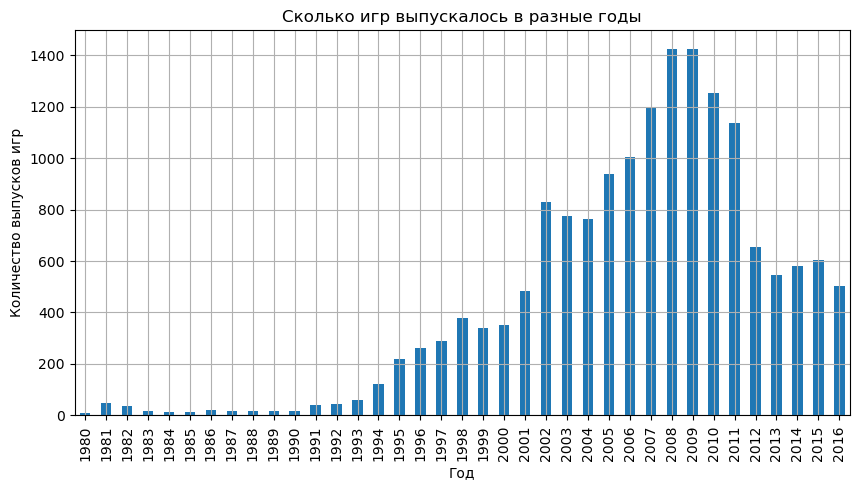

In [47]:
# строим столбчатый график
year = data.groupby('year_of_release')['year_of_release'].count()
year.plot(y = 'year_of_release', kind = 'bar', grid = True, figsize = (10,5))
plt.ylabel('Количество выпусков игр')
plt.xlabel('Год')
plt.title('Cколько игр выпускалось в разные годы')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Мы имеем данные о компьютерных играх с годом выпуска с 1980 г. по 2016 г.

По графику рост количества выпусков начинается с 1994 г.

Большинство выпусков было в период 2002-2011 г.

Пик выпусков компьютерных игр приходится на 2008 г. и 2009 г.

С 2011 г. наблюдаем спад выпусков компьютерных игр. Вероятные причины спада:
 * развитие мобильных устройств.
 * компьютерные игры стали более дорогими проектами с точки зрения и финансовых и человеческих ресурсов, соответственно, компании делают ставки не на много бюджетных игр, а на одну прибыльную.
 * когда был бурный рост в индустрии развивались и разные жанры, вероятно после оценки прибыльности новых жанров в текущий момент делают ставку на определенную игру проверенного жанра.
 * в киноиндустрии популярны франшизы, когда производители понимают, что есть группа фанатов, которая принесет им определенную прибыль, вероятно в компьютерных играх также отрабатывают повторно прибыльный проект.
 * компании заинтересованы удержать клиента, поэтому есть вероятность того, что не выпускают новую игру, а обновляют версию некой популярной игры.

Для оценки рынка важны данные после 2000 г.

[История_компьютерных_игр](https://ru.wikipedia.org/wiki/История_компьютерных_игр)

[История_компьютерных_игр](https://en.wikipedia.org/wiki/History_of_video_games)

> 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.

> В начале 1990-х годов достижения в области микропроцессорных технологий привели к появлению трехмерной полигональной графики в реальном времени на игровых консолях, а также на ПК с помощью видеокарт. Оптический носитель через компакт-диски начали включаться в персональных компьютерах и консолях.

> С 2000-х и по 2010-е годы в индустрии наблюдался демографический сдвиг, поскольку мобильные игры на смартфонах и планшетах вытеснили портативные консоли, а казуальные игры становились все более крупным сектором рынка, а также наблюдался рост числа игроков из Китая и других областей, традиционно не связанных с индустрией. 

</div>

### Продажи по платформам

<div style="border:solid black 2px; padding: 20px">

Посмотрим, как менялись продажи по платформам. Для этого:
* Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
* Рассмотрим характерные сроки появления новых и исчезновение старых платформ.

</div>

In [48]:
# выведем доли продаж по платформам
data.groupby(['platform']).agg({'total_sales' : 'sum'})[['total_sales']]\
    .apply(lambda x: 100*x/x.sum()).sort_values('total_sales', ascending=False)\
    .rename(columns= {'total_sales': 'Доля продаж'})

,Доля продаж
platform,
PS2,13.994874
X360,10.905374
PS3,10.566155
Wii,10.110535
DS,9.107628
PS,8.254475
PS4,3.563953
GBA,3.549658
PSP,3.284750


In [49]:
# сводная таблица по общим продажам топовых платформ (доля продаж 66%)

data.groupby(['platform']).agg({'total_sales' : 'sum'})[['total_sales']]\
    .sort_values('total_sales', ascending=False)\
    .rename(columns= {'total_sales': 'Общие продажи (млн. копий)'}).head(7)

,Общие продажи (млн. копий)
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


In [50]:
# создадим список для среза по платформам, у которых суммарная доля продаж 66%
list =['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

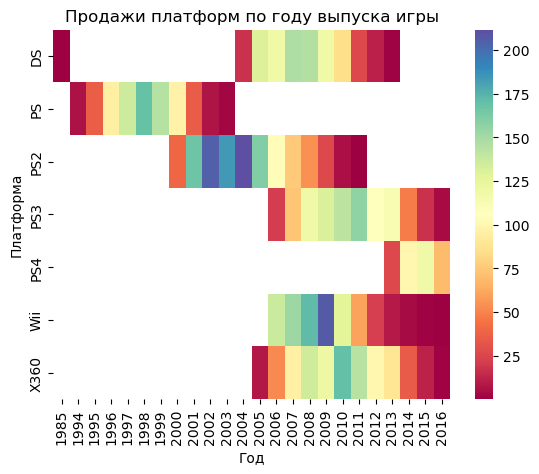

In [51]:
# построим тепловую карту учитывая срез
pivot_year = data.query('platform in @list')\
                 .pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
seaborn.heatmap(pivot_year, cmap = 'Spectral')
plt.ylabel('Платформа')
plt.xlabel('Год')
plt.title('Продажи платформ по году выпуска игры')
plt.show()

<div style="border:solid green 2px; padding: 20px">

1. Платформы с наибольшими суммарными продажами:

| Платформа  | Общие продажи (млн. копий) | Доля продаж (%) |
|:-----------|:--------------------------:| ---------------:|
|PS2         | 1233.56                    |  **13,99**      |
|X360        | 961.24                     |  **10,90**      |
|PS3         | 931.34                     |  **10,57**      |
|Wii         | 891.18                     |  **10,11**      |
|DS          | 802.78                     |  **9,11**       |
|PS          | 727.58                     |  **8,25**       |
|PS4         | 314.14                     |  **3.56**       |

2. В среднем платформа существует 11 лет, активный период продаж платформы в среднем 4 года.
3. В график попало 4 поколения платформы PS. На данном примере можно наглядно отследить, как появляются новые платформы и исчезают старые.
Разница между запусками платформ в среднем 6 лет, в среднем 4 года платформы разных поколей работают одновременно.

[PlayStation](https://ru.wikipedia.org/wiki/PlayStation_(серия_игровых_консолей))

* PlayStation: выпущена в 1994 году
* PlayStation 2: выпущена в 2000 году
* PlayStation 3: выпущена в 2006 году
* PlayStation 4: выпущена в 2013 году

</div>

### Актуальный период для прогноза

<div style="border:solid black 2px; padding: 20px">

**Задача.** Взять данные за соответствующий **актуальный период**. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 
Не учитывайте данные за **предыдущие годы.**

Из пункта выше мы выяснили, что платформы - это разные поколения одних и тех же игровых консолей. В предобработке данных сделали категоризацию платформ. Построим актуальные график по брендам, потому что для брендов были разные даты выпуска и разные пики продаж у поколений платформ, соответственно есть вероятность, что прогноз на 2017 по брендам будет разный исходя из ситуации на 2015-2016 гг конкретного бренда.

</div>

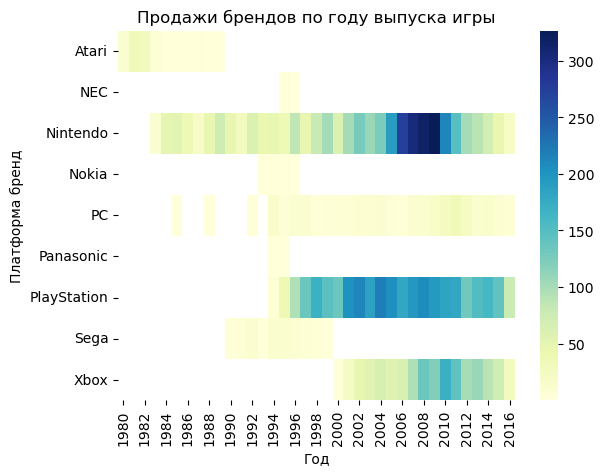

In [52]:
# построим тепловую карту учитывая срез
pivot_platform_type = data.pivot_table(index = 'platform_type', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
seaborn.heatmap(pivot_platform_type, cmap = 'YlGnBu')
plt.ylabel('Платформа бренд')
plt.xlabel('Год')
plt.title('Продажи брендов по году выпуска игры')
plt.show()

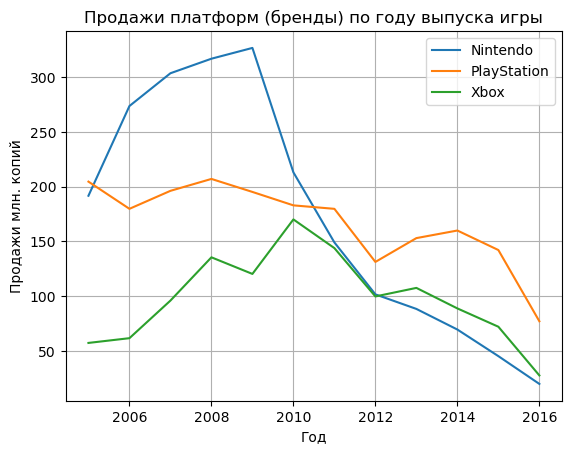

In [53]:
# построим график для топовых игровых консолей
plt.plot(data[(data['platform_type'] == 'Nintendo') & (data['year_of_release'] > 2004)].groupby('year_of_release')['total_sales'].sum(), label='Nintendo')
plt.plot(data[(data['platform_type'] == 'PlayStation') & (data['year_of_release'] > 2004)].groupby('year_of_release')['total_sales'].sum(), label='PlayStation')
plt.plot(data[(data['platform_type'] == 'Xbox') & (data['year_of_release'] > 2004)].groupby('year_of_release')['total_sales'].sum(), label='Xbox')

plt.grid(True)
plt.ylabel('Продажи млн. копий')
plt.xlabel('Год')
plt.title('Продажи платформ (бренды) по году выпуска игры')
plt.legend()
plt.show()

<div style="border:solid green 2px; padding: 20px">

Актуальные периоды для прогноза на 2017 г. по брендам:
* **Nintendo.** В 2009 г. был пик продаж Nintendo. Но после 2012 г. продажи Nintendo стали ниже продаж других брендов. Соответственно для прогноза продаж на 2017 г. по Nintendo можно брать в расчет динамику уже 2014-2016 гг.
* **PlayStation.** PS3 выпущена в 2006 году. PS4 выпущена в 2013 году. Достаточно ровные продажи (без явных пиков) после запуска PS3. после выпуска PS4 наблюдаем рост продаж, но после продажи идут на спад.
* **Xbox.** Xbox 360 выпущена в 2005 году. Xbox One выпущена в 2013 году. После выпуска Xbox 360 наблюдаем рост продаж, а после выпуска Xbox One наоборот спад продаж, т.е. не было ожидаемого роста продаж, который мы наблюдали после выпуска Xbox 360. По текущей динамике в 2017 г. не можем прогнозировать рост продаж.
Ниже интересный факт из Википедии, и возможно падение продаж Xbox One было связано с тем, что PS4 вышла в этот же период и была более 'прокаченная', современная на тот момент:
> Xbox One S — очередная консоль от компании, призванная побороть Sony PlayStation 4, компания прислушалась к игрокам и внесла желанные улучшения, такие как размер, дизайн, интеграцию блока питания, изменения в геймпаде. Релиз состоялся в 2016 году.

Актуальным периодом для прогноза продаж всех платформ можно считать период с 2013 года, с момента запуска платформ последнего поколения PS4 и Xbox One.

Общий тренд: падение продаж с 2015 г. Так как данные за 2016 г. неполные, то возможно падение было не таким критичным.

</div>

### Потенциально прибыльные платформы

<div style="border:solid black 2px; padding: 20px">

Рассмотрим: какие платформы лидируют по продажам, и какой у них тренд: рост или падение.

Выберем несколько потенциально прибыльных платформ.

Возьмем данные с 2013 г.

</div>

In [54]:
# сгруппируем данные по столбцу 'platform_type' и platform'
data.query('year_of_release > 2012').groupby(['platform', 'platform_type'])['total_sales'].sum()\
    .sort_values(ascending=False)

platform  platform_type
PS4       PlayStation      314.14
PS3       PlayStation      181.43
XOne      Xbox             159.32
3DS       Nintendo         143.25
X360      Xbox             136.80
WiiU      Nintendo          64.63
PC        PC                39.43
PSV       PlayStation       32.99
Wii       Nintendo          13.66
PSP       PlayStation        3.50
DS        Nintendo           1.54
Name: total_sales, dtype: float64

In [55]:
# выведем доли продаж по платформам
data.query('year_of_release > 2012').groupby(['platform']).agg({'total_sales' : 'sum'})[['total_sales']]\
    .apply(lambda x: 100*x/x.sum()).sort_values('total_sales', ascending=False)\
    .rename(columns= {'total_sales': 'Доля продаж'})

,Доля продаж
platform,
PS4,28.801951
PS3,16.634424
XOne,14.607267
3DS,13.133888
X360,12.542519
WiiU,5.925607
PC,3.615143
PSV,3.024691
Wii,1.252418


In [56]:
# сгруппируем данные по столбцам 'platform_type', 'platform' и 'year_of_release'
data.query('year_of_release > 2012')\
    .query('platform == "PS4" or platform == "PS3" or platform == "X360" or platform == "3DS" or platform == "XOne"')\
    .groupby(['platform_type', 'platform', 'year_of_release'])['total_sales'].sum()\
    .reset_index()\
    .rename(columns= {'total_sales': 'Общие продажи', 'platform_type': 'Бренд', 'platform': 'Платформа', 'year_of_release': 'Год'})

,Бренд,Платформа,Год,Общие продажи
0,Nintendo,3DS,2013,56.57
1,Nintendo,3DS,2014,43.76
2,Nintendo,3DS,2015,27.78
3,Nintendo,3DS,2016,15.14
4,PlayStation,PS3,2013,113.25
5,PlayStation,PS3,2014,47.76
6,PlayStation,PS3,2015,16.82
7,PlayStation,PS3,2016,3.60
8,PlayStation,PS4,2013,25.99
9,PlayStation,PS4,2014,100.00


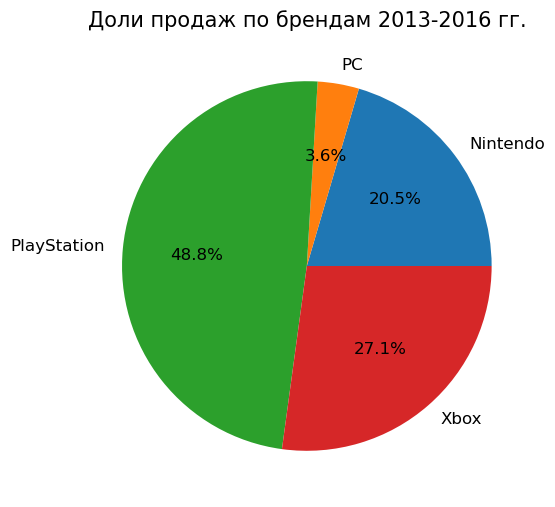

In [57]:
plt.figure(figsize=(6,6))
# определяем данные
data_brand = data.query('year_of_release > 2012').groupby('platform_type')['total_sales'].sum()
labels_brand = ['Nintendo', 'PC', 'PlayStation', 'Xbox']
textprops = {'fontsize':12}

# строим круговую диаграмму 
plt.pie(data_brand, labels = labels_brand, autopct = '%1.1f%%', textprops = textprops)
plt.title('Доли продаж по брендам 2013-2016 гг.', fontsize = 15)
plt.show()

<div style="border:solid green 2px; padding: 20px">

1. ТОР5 платформ лидеров по продажам в период 2013-2016 гг.:

| Платформа  | Общие продажи (млн. копий) | Доля продаж (%) |
|:-----------|:--------------------------:| ---------------:|
|PS4         | 314.14                     |  **28.80**      |
|PS3         | 181.43                     |  **16.63**      |
|XOne        | 159.32                     |  **14.60**      |
|3DS         | 143.25                     |  **13.13**      |
|X360        | 136.80                     |  **12.54**      |

2. У всех платформ наблюдаем падающий тренд продаж.
3. Потенциально прибыльная платформа (бренд) - PlayStation. Доля продаж 48.8%.

</div>

### График "ящик с усами" по продажам

<div style="border:solid black 2px; padding: 20px">

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Возьмем данные только по топ-5 платформам лидеров продаж в период 2013-2016 гг.

</div>

In [58]:
# данные только за актуальный период
data_actual_years = data[data['year_of_release'].isin([2013, 2014, 2015, 2016])]
# проверяем фильтрацию
data_actual_years['year_of_release'].value_counts()

year_of_release
2015    606
2014    581
2013    544
2016    502
Name: count, dtype: int64

In [59]:
# данные только за актуальный период и топ-5 платформам лидеров по продажам
data_actual_years_top5 = data_actual_years[data_actual_years['platform'].isin(['PS4', 'PS3', 'XOne', '3DS', 'X360'])]
# проверяем фильтрацию
data_actual_years_top5['platform'].value_counts()

platform
PS4     392
PS3     345
3DS     303
XOne    247
X360    186
Name: count, dtype: int64

In [60]:
data_actual_years_top5['total_sales'].describe() # выводим основные статистические данные по столбцу

count    1473.000000
mean        0.634718
std         1.454708
min         0.010000
25%         0.050000
50%         0.170000
75%         0.580000
max        21.050000
Name: total_sales, dtype: float64

In [61]:
print('Количество больше 3 млн копий:', len(data_actual_years_top5[data_actual_years_top5['total_sales'] > 3]))
print('Общее количество:', len(data_actual_years_top5['total_sales']))

Количество больше 3 млн копий: 68
Общее количество: 1473


In [62]:
# данные только c продажами меньше 3 млн копий
data_actual_years_top5_corr = data_actual_years_top5[data_actual_years_top5['total_sales'] < 3]
# проверяем фильтрацию
data_actual_years_top5_corr['total_sales'].describe()

count    1405.000000
mean        0.388064
std         0.552397
min         0.010000
25%         0.050000
50%         0.150000
75%         0.460000
max         2.960000
Name: total_sales, dtype: float64

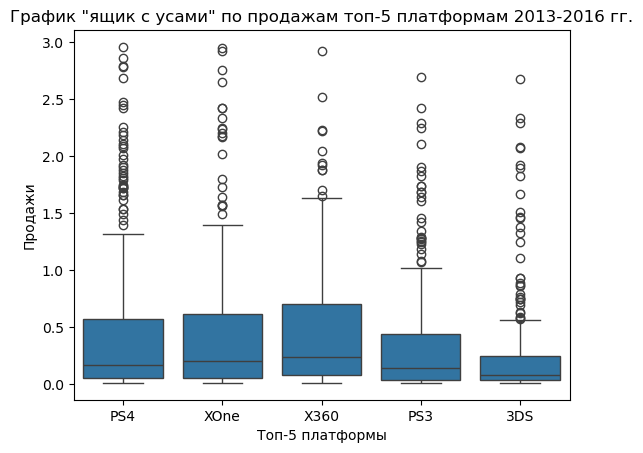

In [63]:
# визуализируем распределения данных по квартилям с помощью boxplot
seaborn.boxplot(x = 'platform', y = 'total_sales', data = data_actual_years_top5_corr)
plt.title('График "ящик с усами" по продажам топ-5 платформам 2013-2016 гг.')
plt.ylabel('Продажи')
plt.xlabel('Топ-5 платформы')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Выводы про данные распределения (топ-5 платформ лидеров продаж в период 2013-2016 гг.):
* Сделали срез по общим продажам до 3 млн. копий.
* Медианные продажи выше у 'X360' (0.24), ниже у '3DS' (0.08).
* Максимальная upper fence у 'X360' (1.65).
* Самый широкий диапазон продаж млн. копий наблюдается у 'X360', а наименьший у '3DS'.
* Выбросы присутствуют в верхних значениях распределения.

</div>

### Влияние отзывов пользователей и критиков на продажи внутри платформы

<div style="border:solid black 2px; padding: 20px">

Проверим, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Период оставляем актуальный: 2013-2016 гг.

Выберем 2 популярные платформы последнего поколения топовых брендов:
* PlayStation: PS4
* Xbox: XOne

</div>

In [64]:
# датафреймы по платформам PS4 и XOne
data_actual_years_ps4 = data_actual_years_top5[data_actual_years_top5['platform'] == 'PS4']
data_actual_years_xone = data_actual_years_top5[data_actual_years_top5['platform'] == 'XOne']

In [65]:
# вычисляем коэффициент корреляции
print('Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий):',
      data_actual_years_ps4['critic_score'].corr(data_actual_years_ps4['total_sales']))
print('Коэффициент корреляции XOne (оценка критиков и продажи млн. копий):',
      data_actual_years_xone['critic_score'].corr(data_actual_years_xone['total_sales']))

Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий): 0.40656790206178145
Коэффициент корреляции XOne (оценка критиков и продажи млн. копий): 0.4169983280084016


In [66]:
# вычисляем коэффициент корреляции
print('Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий):',
      data_actual_years_ps4['user_score'].corr(data_actual_years_ps4['total_sales']))
print('Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий):',
      data_actual_years_xone['user_score'].corr(data_actual_years_xone['total_sales']))

Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий): -0.03195711020455646
Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий): -0.0689250532827942


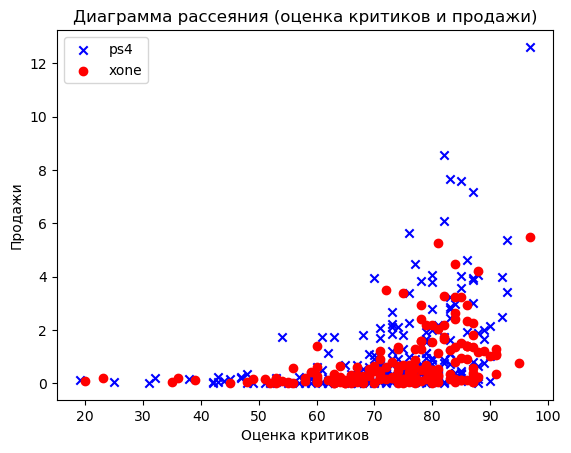

In [67]:
# строим диаграмму рассеяния для двух таблиц
x1 = data_actual_years_ps4['critic_score']
y1 = data_actual_years_ps4['total_sales']

x2 = data_actual_years_xone['critic_score']
y2 = data_actual_years_xone['total_sales']

plt.scatter(x1, y1, c = 'b', marker = 'x', label='ps4')
plt.scatter(x2, y2, c = 'r', marker = 'o', label='xone')
plt.title('Диаграмма рассеяния (оценка критиков и продажи)')
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
plt.legend(loc='upper left')
plt.show()

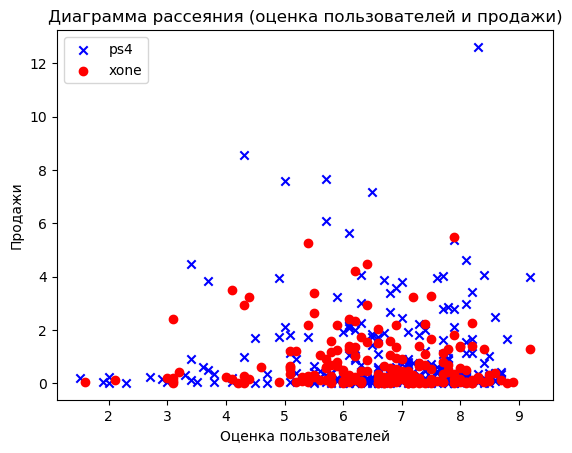

In [68]:
# строим диаграмму рассеяния для двух таблиц
x3 = data_actual_years_ps4['user_score']
y3 = data_actual_years_ps4['total_sales']

x4 = data_actual_years_xone['user_score']
y4 = data_actual_years_xone['total_sales']

plt.scatter(x3, y3, c = 'b', marker = 'x', label = 'ps4')
plt.scatter(x4, y4, c = 'r', marker = 'o', label = 'xone')
plt.title('Диаграмма рассеяния (оценка пользователей и продажи)')
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')
plt.legend(loc='upper left')
plt.show()

In [69]:
data_actual_years_ps4.groupby(['critic_score_type']).agg({'total_sales' : 'sum'})[['total_sales']]\
    .apply(lambda x: 100*x/x.sum()).reset_index().sort_values('total_sales')\
    .rename(columns= {'total_sales': 'Доля продаж', 'critic_score_type': 'Оценка критиков'})

,Оценка критиков,Доля продаж
2,3. от 20 до 29,0.019100
1,2. от 10 до 19,0.038200
3,4. от 30 до 39,0.120965
4,5. от 40 до 49,0.436111
5,6. от 50 до 59,1.212835
6,7. от 60 до 69,5.016871
0,10. от 90 до 100,9.903228
9,нет оценки,22.171643
7,8. от 70 до 79,22.744636
8,9. от 80 до 89,38.336411


In [70]:
data_actual_years_ps4.groupby(['user_score_type']).agg({'total_sales' : 'sum'})[['total_sales']]\
    .apply(lambda x: 100*x/x.sum()).reset_index().sort_values('total_sales')\
    .rename(columns= {'total_sales': 'Доля продаж', 'user_score_type': 'Оценка пользователей'})

,Оценка пользователей,Доля продаж
2,3,0.149615
1,2,0.155981
0,10,1.263768
3,4,3.558923
4,5,8.684026
5,6,9.072388
8,9,14.057427
7,8,17.721398
9,нет оценки,22.034762
6,7,23.301713


<div style="border:solid green 2px; padding: 20px">

Влияние отзывов пользователей и критиков на продажи внутри популярных платформ за актуальный период.

**Есть зависимость от оценки критиков и количеством продаж.** Чем выше оценка, тем больше продаж.

r>0,30≤0,69 – умеренная положительная связь.

* Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий): 0.41
* Коэффициент корреляции XOne (оценка критиков и продажи млн. копий): 0.42

**Нет зависимости от оценки пользователей и количеством продаж.**

r>-0,01≤-0,29 – слабая отрицательная связь.

* Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий): -0.03
* Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий): -0.07

Можно предположить, что покупку пользователь делает на основании отзывов критиков, а уже после оставляет свою оценку, которая может быть гораздо ниже ожидаемой. Это также видно по соотношению доли продаж по оценке критиков и доли продаж по оценке пользователей.


</div>

<div style="border:solid black 2px; padding: 20px">

Соотнесем данные по влиянию оценок на популярных платформах с данными по влиянию оценок на всех платформах.

Период оставляем актуальный: 2013-2016 гг.

</div>

In [71]:
# вычисляем коэффициент корреляции
print('Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий):',
      data_actual_years_ps4['critic_score'].corr(data_actual_years_ps4['total_sales']))
print('Коэффициент корреляции XOne (оценка критиков и продажи млн. копий):',
      data_actual_years_xone['critic_score'].corr(data_actual_years_xone['total_sales']))
print('Коэффициент корреляции все платформы (оценка критиков и продажи млн. копий):',
      data_actual_years['critic_score'].corr(data_actual_years['total_sales']))

Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий): 0.40656790206178145
Коэффициент корреляции XOne (оценка критиков и продажи млн. копий): 0.4169983280084016
Коэффициент корреляции все платформы (оценка критиков и продажи млн. копий): 0.31369951510273686


In [72]:
# вычисляем коэффициент корреляции
print('Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий):',
      data_actual_years_ps4['user_score'].corr(data_actual_years_ps4['total_sales']))
print('Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий):',
      data_actual_years_xone['user_score'].corr(data_actual_years_xone['total_sales']))
print('Коэффициент корреляции все платформы (оценка пользователей и продажи млн. копий):',
      data_actual_years['user_score'].corr(data_actual_years['total_sales']))

Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий): -0.03195711020455646
Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий): -0.0689250532827942
Коэффициент корреляции все платформы (оценка пользователей и продажи млн. копий): -0.002607813354598268


In [73]:
# матрица корреляции
corr = data_actual_years[['critic_score', 'user_score', 'total_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
total_sales,0.313700,-0.002608,1.000000


<div style="border:solid green 2px; padding: 20px">

**Влияние отзывов пользователей и критиков на продажи внутри всех платформ за актуальный период.**

Подтвердили выводы предыдущего пункта. Можно транслировать полученные выводы на все данные:

* Есть зависимость от оценки критиков и количеством продаж. Чем выше оценка, тем больше продаж.

Коэффициент корреляции: **0.31.** r>0,30≤0,69 – умеренная положительная связь.

* Нет зависимости от оценки пользователей и количеством продаж (или эта зависимость выражена опосредованно).

Коэффициент корреляции: **0.00.** r>-0,01≤-0,29 – слабая отрицательная связь.

**При покупке компьютерной игры покупатель ориентируется на оценку критиков.**

</div>

### Распределение игр по жанрам

<div style="border:solid black 2px; padding: 20px">

Исследуем общее распределение игр по жанрам.

Выведем самые прибыльные жанры.

Выделим жанры с высокими и низкими продажами.

Период оставляем актуальный: 2013-2016 гг.

</div>

In [74]:
# сводная таблица по общим продажам 
data_actual_years.pivot_table(index = 'genre_type', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                              aggfunc = 'sum').round(0)\
                 .sort_values('total_sales', ascending=False)\
                 .rename(columns= {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе',
                                   'jp_sales': 'Продажи в Японии', 'other_sales': 'Продажи в других странах',
                                   'total_sales': 'Общие продажи'})

,Продажи в Европе,Продажи в Японии,Продажи в Северной Америке,Продажи в других странах,Общие продажи
genre_type,,,,,
Action — Прохождение уровней для битвы с боссами,118.0,40.0,126.0,37.0,322.0
Shooter — Cтрелялка,88.0,7.0,110.0,29.0,233.0
Sports — Соревнования по видам спорта,61.0,5.0,65.0,19.0,151.0
Role-Playing — Ролевая игра,37.0,51.0,46.0,11.0,146.0
Misc — Другое,20.0,9.0,27.0,6.0,63.0
"Platform — Прыгание, лазанье, собирание",16.0,5.0,18.0,4.0,43.0
Racing — Гонка,20.0,2.0,13.0,4.0,40.0
Fighting — Бой один на один,9.0,8.0,16.0,4.0,35.0
Adventure — Преодоление препятствии,8.0,6.0,7.0,2.0,24.0


In [75]:
# выведем доли продаж
data_actual_years.groupby(['genre_type'])\
                 .agg({'sum'})[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]\
                 .apply(lambda x: 100*x/x.sum()).round(1)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
,sum,sum,sum,sum,sum
genre_type,,,,,
Action — Прохождение уровней для битвы с боссами,28.8,30.1,28.8,31.0,29.5
Adventure — Преодоление препятствии,1.6,2.1,4.1,2.0,2.2
Fighting — Бой один на один,3.6,2.2,5.4,3.0,3.2
Misc — Другое,6.3,5.1,6.5,5.1,5.8
"Platform — Прыгание, лазанье, собирание",4.1,4.0,3.4,3.4,3.9
Puzzle — Решение головоломок,0.2,0.3,0.8,0.1,0.3
Racing — Гонка,3.0,5.1,1.6,3.7,3.7
Role-Playing — Ролевая игра,10.6,9.4,36.3,9.6,13.4


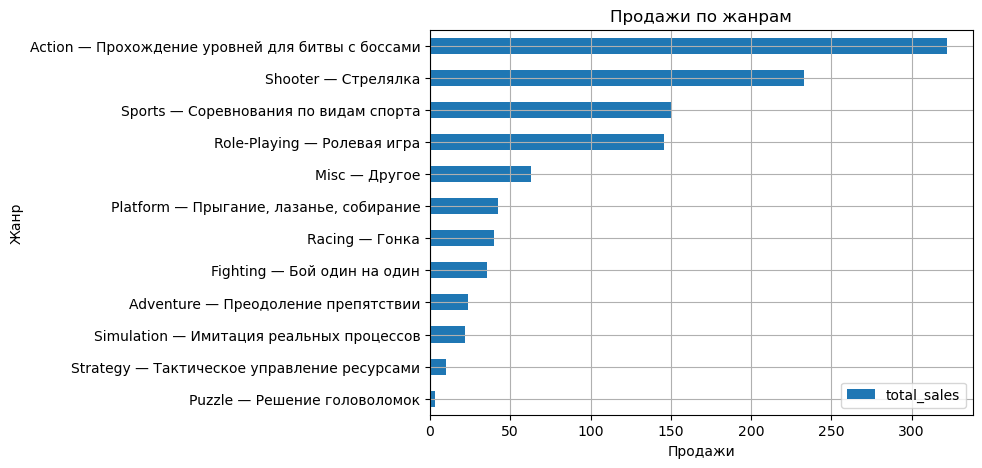

In [76]:
data_actual_years.pivot_table(index = 'genre_type', values = 'total_sales', aggfunc = 'sum')\
                 .sort_values('total_sales').plot(kind = 'barh', grid = True, figsize = (7,5), title = 'Продажи по жанрам')
plt.xlabel('Продажи')
plt.ylabel('Жанр')
plt.legend(loc='lower right')
plt.show()
# строим график с помощью сводной таблицы

<div style="border:solid green 2px; padding: 20px">

**Прибыльные жанры.**

| Жанр ТОР5  | Доля продаж (%) Северная Америка| Доля продаж (%) Европа| Доля продаж (%) Япония| Доля продаж (%) Другие| Доля продаж (%) Итого|
|:-----------|:-------------------------------:|:---------------------:|:---------------------:|:---------------------:|:--------------------:|
|Action      | 28.8                            |30.1                   | 28.8                  | 31.0                  | **29.5**             |
|Shooter     | 25.0                            |22.4                   | 4.7                   | 24.0                  | **21.4**             |
|Sports      | 14.9                            |15.4                   | 3.8                   | 16.2                  | **13.8**             |
|Role-Playing| 10.6                            |9.4                    | 36.3                  | 9.6                   | **13.4**             |
|**ИТОГ**    | **79.4**                        |**77.4**               | **73.6**              | **80.8**              | **78.0**             |

* Из 12 жанров отчетности 4 жанра фактически приносят 78% продаж.
* 50% продаж  - это жанры Action (Прохождение уровней для битвы с боссами) и Shooter (Cтрелялка).
* Самые низкие продажи у жанров Strategy — Тактическое управление ресурсами (доля продаж 0,9%) и Puzzle — Решение головоломок (доля продаж 0,3%).
* В таблице с популярными жанрами выделяются доли продаж в Японии, жанры Shooter и Sports не популярны, но при этом самая большая доля продаж жанра Role-Playing. 

</div>

<div style="border:solid black 2px; padding: 20px">

Посмотрим, как менялись жанровые предпочтения пользователей по годам.

</div>

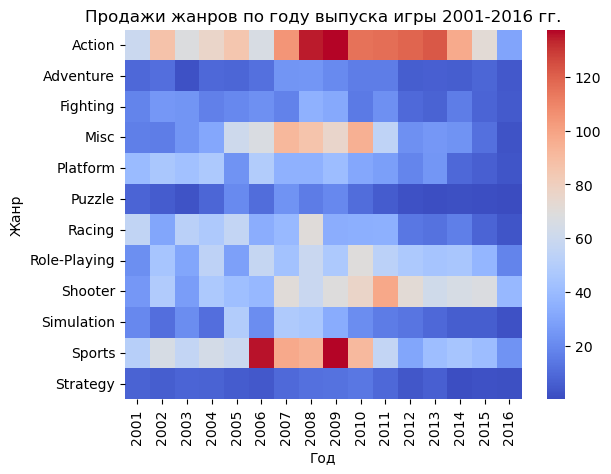

In [77]:
# построим тепловую карту учитывая срез
genre_years = data.query('year_of_release > 2000')\
                  .pivot_table(index = 'genre', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
seaborn.heatmap(genre_years, cmap= 'coolwarm')
plt.ylabel('Жанр')
plt.xlabel('Год')
plt.title('Продажи жанров по году выпуска игры 2001-2016 гг.')
plt.show()

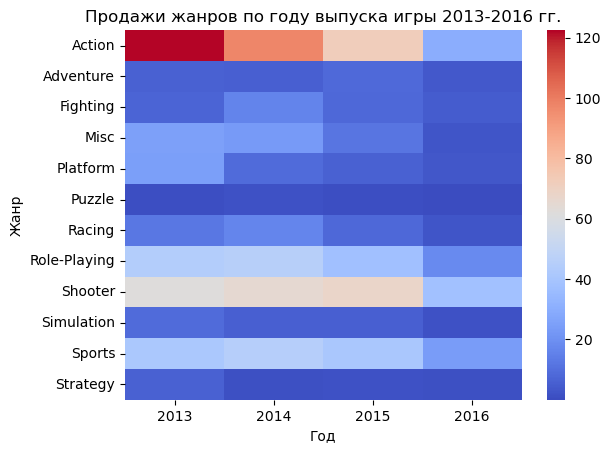

In [78]:
# построим тепловую карту учитывая срез
genre_years = data.query('year_of_release > 2012')\
                  .pivot_table(index = 'genre', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
seaborn.heatmap(genre_years, cmap= 'coolwarm')
plt.ylabel('Жанр')
plt.xlabel('Год')
plt.title('Продажи жанров по году выпуска игры 2013-2016 гг.')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Данные графики еще раз продемонстрировали нам, как важно для прогноза брать актуальный период.

Если бы мы выбрали данные с более ранним периодом, то жанр Sport вероятно оказался на втором месте по прогнозу продаж, и мы неправильно бы вывели актуальные тренды.

Жанр Action лидирует из года в год. Жанр Sport был популярен в 2006-2010 гг. У жанров с долей продаж меньше 5% позиции немного смещаются, но их доля очень маленькая и они в меньшей степени влияют на рынок.

</div>

### Вывод по исследовательскому анализу данных

<div style="border:solid blue 2px; padding: 20px">

***Изучив общую информацию о параметрах продаж компьютерных игр, можно сделать следующие выводы:***

**Частота выпусков игр в разные годы.**
* Мы имеем данные о компьютерных играх с годом выпуска с 1980 г. по 2016 г.
* По графику рост количества выпусков начинается с 1994 г.
* Большинство выпусков было в период 2002-2011 г.
* Пик выпусков компьютерных игр приходится на 2008 г. и 2009 г.
* С 2011 г. наблюдаем спад выпусков компьютерных игр. Вероятные причины спада:
    * развитие мобильных устройств.
    * компьютерные игры стали более дорогими проектами с точки зрения и финансовых и человеческих ресурсов, соответственно, компании делают ставки не на много бюджетных игр, а на одну прибыльную.
    * когда был бурный рост в индустрии развивались и разные жанры, вероятно после оценки прибыльности новых жанров в текущий момент делают ставку на определенную игру проверенного жанра.
    * в киноиндустрии популярны франшизы, когда производители понимают, что есть группа фанатов, которая принесет им определенную прибыль, вероятно в компьютерных играх также отрабатывают повторно прибыльный проект. Компании заинтересованы удержать клиента, поэтому есть вероятность того, что не выпускают новую игру, а обновляют версию некой популярной игры.

**Продажи по платформам за весь период.**

* Платформы с наибольшими суммарными продажами за весь период:

| Платформа  | Общие продажи (млн. копий) | Доля продаж (%) |
|:-----------|:--------------------------:|:---------------:|
|PS2         | 1233.56                    |  **13.99**      |
|X360        | 961.24                     |  **10.90**      |
|PS3         | 931.34                     |  **10.57**      |
|Wii         | 891.18                     |  **10.11**      |
|DS          | 802.78                     |  **9.11**       |
|PS          | 727.58                     |  **8.25**       |
|PS4         | 314.14                     |  **3.56**       |

* В среднем платформа существует 11 лет, по продажам активный период работы платформы в среднем 4 года.
* В график попало 4 поколения платформы PS. На данном примере можно наглядно отследить, как появляются новые платформы и исчезают старые.
Разница между запусками платформ в среднем 6 лет, в среднем 4 года платформы разных поколей работают одновременно.


**Актуальный период для прогноза продаж.**

* Актуальным периодом для прогноза продаж всех платформ можно считать период с 2013 года, с момента запуска платформ последнего поколения PS4 и Xbox One.
* Общий тренд: падение продаж с 2015 г. Так как данные за 2016 г. неполные, то возможно падение было не таким критичным.

**Потенциально прибыльные платформы (2013-2016 гг.).**

* Топ-5 платформ лидеров по продажам (2013-2016 гг.):

| Платформа  | Общие продажи (млн. копий) | Доля продаж (%) |
|:-----------|:--------------------------:|:---------------:|
|PS4         | 314.14                     |  **28.80**      |
|PS3         | 181.43                     |  **16.63**      |
|XOne        | 159.32                     |  **14.60**      |
|3DS         | 143.25                     |  **13.13**      |
|X360        | 136.80                     |  **12.54**      |

* У всех платформ наблюдаем падающий тренд продаж.
* Потенциально прибыльная платформа - PlayStation.

**Распределения (топ-5 платформ лидеров продаж 2013-2016 гг.).**

* Медианные продажи выше у X360 (0.24), ниже у 3DS (0.08).
* Максимальная upper fence у X360 (1.65).
* Самый широкий диапазон продаж млн. копий наблюдается у X360, а наименьший у 3DS.
* Выбросы присутствуют в верхних значениях распределения.

**Влияние отзывов пользователей и критиков на продажи внутри платформы 2013-2016 гг.**

1. Есть зависимость от оценки критиков и количеством продаж. Чем выше оценка, тем больше продаж.

r>0,30≤0,69 – умеренная положительная связь.

* Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий): 0.41
* Коэффициент корреляции XOne (оценка критиков и продажи млн. копий): 0.42

2. Нет зависимости от оценки пользователей и количеством продаж.

r>-0,01≤-0,29 – слабая отрицательная связь.

* Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий): -0.03
* Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий): -0.07

Можно предположить, что покупку пользователь делает на основании отзывов критиков, а уже после оставляет свою оценку, которая может быть гораздо ниже ожидаемой. Это также видно по соотношению доли продаж по оценке критиков и доли продаж по оценке пользователей.

***Для продаж всех платформ эти закономерности также распространяются.*** При покупке компьютерной игры покупатель ориентируется на оценку критиков.

**Распределение игр по жанрам 2013-2016 гг.**

* Прибыльные жанры.

| Жанр ТОР5  | Доля продаж (%) Северная Америка| Доля продаж (%) Европа| Доля продаж (%) Япония| Доля продаж (%) Другие| Доля продаж (%) Итого|
|:-----------|:-------------------------------:|:---------------------:|:---------------------:|:---------------------:|:--------------------:|
|Action      | 28.8                            |30.1                   | 28.8                  | 31.0                  | **29.5**             |
|Shooter     | 25.0                            |22.4                   | 4.7                   | 24.0                  | **21.4**             |
|Sports      | 14.9                            |15.4                   | 3.8                   | 16.2                  | **13.8**             |
|Role-Playing| 10.6                            |9.4                    | 36.3                  | 9.6                   | **13.4**             |
|**ИТОГ**    | **79.4**                        |**77.4**               | **73.6**              | **80.8**              | **78.0**             |

* Из 12 жанров отчетности 4 жанра фактически приносят 78% продаж.
* 50% продаж  - это жанры Action (Прохождение уровней для битвы с боссами) и Shooter (Cтрелялка).
* Самые низкие продажи у жанров Strategy — Тактическое управление ресурсами (доля продаж 0,9%) и Puzzle — Решение головоломок (доля продаж 0,3%).
* В таблице с популярными жанрами выделяются доли продаж в Японии, жанры Shooter и Sports не популярны, но при этом самая большая доля продаж жанра Role-Playing. 
* График распределения жанров по годам продемонстрировал, как важно для прогноза брать актуальный период. Если бы мы выбрали данные с более ранним периодом, то жанр Sport вероятно оказался на втором месте по прогнозу продаж, и мы неправильно бы вывели актуальные тренды.

</div>

[Начало проекта](#Начало_проекта)

<a id="Портрет_пользователя_каждого_региона"></a>

## Портрет пользователя каждого региона

### Влияние региона на общие продажи

<div style="border:solid black 2px; padding: 20px">

Определим долю региона в общих продажах и соответственно влияние региона на общую выручку.

Период оставляем актуальный: 2013-2016 гг., так как в пункте выше мы выяснили, что предпочтения пользователей меняются, а нам нужны актуальные тренды продаж.

</div>

In [79]:
# продажи по регионам
data_actual_years.groupby('store')[['na_sales', 'eu_sales', 'jp_sales','other_sales', 'total_sales']].agg('sum').round()\
                 .rename(columns= {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе',
                                   'jp_sales': 'Продажи в Японии', 'other_sales': 'Продажи в других странах',
                                   'total_sales': 'Общие продажи'})

,Продажи в Северной Америке,Продажи в Европе,Продажи в Японии,Продажи в других странах,Общие продажи
store,,,,,
Интернет-магазин Стримчик,438.0,392.0,141.0,120.0,1091.0


In [80]:
# доли продаж по регионам
print('Доля продаж в Северной Америке:', (data_actual_years['na_sales'].sum() / data_actual_years['total_sales'].sum()).round(2))
print('Доля продаж в Европе:', (data_actual_years['eu_sales'].sum() / data_actual_years['total_sales'].sum()).round(2))
print('Доля продаж в Японии:', (data_actual_years['jp_sales'].sum() / data_actual_years['total_sales'].sum()).round(2))
print('Доля продаж в других странах:', (data_actual_years['other_sales'].sum() / data_actual_years['total_sales'].sum()).round(2))

Доля продаж в Северной Америке: 0.4
Доля продаж в Европе: 0.36
Доля продаж в Японии: 0.13
Доля продаж в других странах: 0.11


<div style="border:solid green 2px; padding: 20px">

76% продаж в 2013-2016 гг. приходится на Северную Америку и Европу, соответственно на предпочтения пользователей из этих регионов надо обращать внимание в первую очередь.

</div>

### Популярные платформы по регионам

<div style="border:solid black 2px; padding: 20px">

Определим популярные платформы (топ-5) по регионам.

Период оставляем актуальный: 2013-2016 гг.

</div>

In [81]:
data_actual_years['platform_type'].sort_values().unique() # выведем перечень уникальных значений столбца

array(['Nintendo', 'PC', 'PlayStation', 'Xbox'], dtype=object)

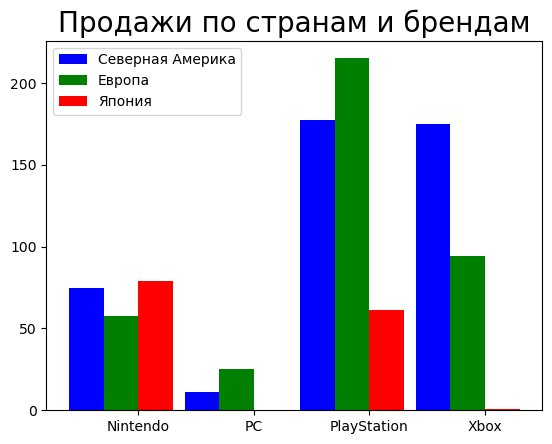

In [82]:
# столбчатый график соотношение продаж по странам внутри брендов 
index = np.arange(4)
values1 = data_actual_years.groupby('platform_type')['na_sales'].sum()
values2 = data_actual_years.groupby('platform_type')['eu_sales'].sum()
values3 = data_actual_years.groupby('platform_type')['jp_sales'].sum()
bw = 0.3
plt.title('Продажи по странам и брендам', fontsize = 20)
plt.bar(index, values1, bw, color = 'b', label = 'Северная Америка')
plt.bar(index+bw, values2, bw, color = 'g', label = 'Европа')
plt.bar(index+2*bw, values3, bw, color = 'r', label = 'Япония')
plt.xticks(index+1.5*bw,['Nintendo', 'PC', 'PlayStation', 'Xbox'])
plt.legend()
plt.show()

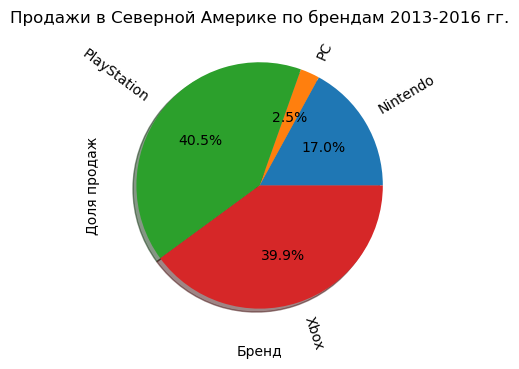

In [83]:
# круговая диаграмма
data_actual_years.groupby('platform_type')['na_sales'].sum()\
                 .plot(kind = 'pie', shadow = True, figsize = (4,4),
                       autopct = '%1.1f%%', fontsize = 10, rotatelabels = True,
                       title = 'Продажи в Северной Америке по брендам 2013-2016 гг.')
plt.ylabel('Доля продаж')
plt.xlabel('Бренд')
plt.show()

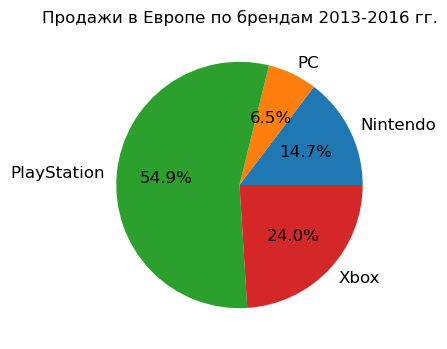

In [84]:
plt.figure(figsize=(4,4))
# определяем данные
data_brand_eu = data_actual_years.groupby('platform_type')['eu_sales'].sum()
labels_brand_eu = ['Nintendo', 'PC', 'PlayStation', 'Xbox']
textprops = {'fontsize':12}

# строим круговую диаграмму 
plt.pie(data_brand_eu, labels = labels_brand_eu, autopct = '%1.1f%%', textprops = textprops)
plt.title('Продажи в Европе по брендам 2013-2016 гг.', fontsize = 12)
plt.show()

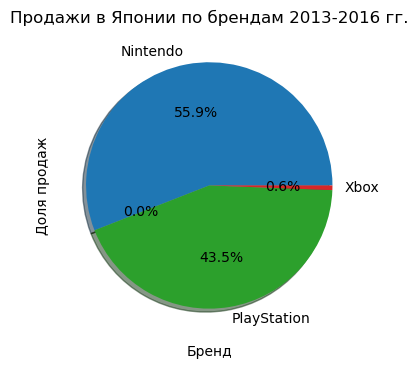

In [85]:
# круговая диаграмма
data_actual_years.groupby('platform_type')['jp_sales'].sum()\
                 .plot(kind = 'pie', shadow = True, figsize = (4,4),
                       autopct = '%1.1f%%', fontsize = 10, title = 'Продажи в Японии по брендам 2013-2016 гг.')
plt.ylabel('Доля продаж')
plt.xlabel('Бренд')
plt.show()

In [86]:
# выведем доли продаж
data_actual_years.groupby(['platform_type']).agg({'sum'})[['na_sales', 'eu_sales', 'jp_sales']]\
                 .apply(lambda x: 100*x/x.sum()).round(2)

,na_sales,eu_sales,jp_sales
,sum,sum,sum
platform_type,,,
Nintendo,17.03,14.68,55.93
PC,2.54,6.47,0.00
PlayStation,40.50,54.86,43.46
Xbox,39.93,23.99,0.60


In [87]:
# сводная таблица
data_actual_years.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')\
                 .sort_values('na_sales', ascending=False)\
                 .rename(columns= {'na_sales': 'Продажи в Северной Америке',
                                   'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'})

,Продажи в Европе,Продажи в Японии,Продажи в Северной Америке
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


In [88]:
# выведем доли продаж
data_actual_years.groupby(['platform']).agg({'sum'})[['na_sales', 'eu_sales', 'jp_sales']]\
                 .apply(lambda x: 100*x/x.sum()).round(2)

,na_sales,eu_sales,jp_sales
,sum,sum,sum
platform,,,
3DS,8.73,7.89,48.17
DS,0.13,0.22,0.00
PC,2.54,6.47,0.00
PS3,14.51,17.29,16.59
PS4,24.84,35.97,11.34
PSP,0.00,0.04,2.34
PSV,1.15,1.56,13.21
Wii,1.50,1.51,0.04


<div style="border:solid green 2px; padding: 20px">

* Игровую приставку Sony PlayStation выпускает американская компания Sony Interactive Entertainment, LLC (это подразделение японской компании Sony).
* Компания Nintendo находится в Японии, в городе Киото.
* Серия игровых консолей Xbox принадлежит США.

По графику видим зависимость продаж брендов платформ от регионов. Пользователи регионов поддерживают свои бренды:
* Япония. Nintendo доля продаж 56%, PlayStation доля продаж 43.5%.
* Европа. PlayStation доля продаж 55%. В Европе нет собственного бренда, вероятно пользователи Европы ориентируются на рейтинг критиков или на рекламную активность конкретного бренда.
* Северная Америка. PlayStation доля продаж 40.5%. Xbox доля продаж 40%.

**Платформы топ-5 совпали в Северной Америке и Европе.** Разница только в том, что в Серверной Америке доля Xbox больше. В данных регионах непопулярны портативные консоли (доля 3DS в среднем 8.3%).

| платформа  | бренд          | год выпуска| доля продаж (%) Северная Америка| доля продаж (%) Европа| 
|:-----------|:--------------:|:----------:|:-------------------------------:|----------------------:| 
|PS4         | PlayStation    |2013        | 24.8                            | 36.0                  | 
|XOne        | Xbox           |2013        | 21.3                            | 13.1                  |
|X360        | Xbox           |2005        | 18.7                            | 10.8                  | 
|PS3         | PlayStation    |2006        | 14.5                            | 17.3                  | 
|3DS         | Nintendo       |2011        | 8.7                             | 7.9                   |

**Платформы топ-5 в Японии.** Рынок Японии отличается тем, что здесь предпочитают портативные игровые консоли. В топ-5 попали сразу 2 портативные консоли 3DS и PSV. Доля продаж игровой консоли прошлого поколения PS3 больше доли модели нового поколения PS4. В Северной Америке и Европе больше доля продаж моделей нового поколения.

| платформа  | бренд          | год выпуска| доля продаж (%) Япония| 
|:-----------|:--------------:|:----------:|----------------------:|
|3DS         | Nintendo       |2011        | 48.1                  | 
|PS3         | PlayStation    |2006        | 16.6                  | 
|PSV         | PlayStation    |2011        | 13.2                  | 
|PS4         | PlayStation    |2013        | 11.3                  |
|WiiU        | Nintendo       |2011        | 7.7                   | 

</div>

### Популярные жанры по регионам

<div style="border:solid black 2px; padding: 20px">

Определим популярные жанры по регионам.

Период оставляем актуальный: 2013-2016 гг.

</div>

In [89]:
# сводная таблица
data_actual_years.pivot_table(index = 'genre_type', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')\
                 .sort_values('na_sales', ascending=False)\
                 .rename(columns= {'na_sales': 'Продажи в Северной Америке',
                                   'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'})

,Продажи в Европе,Продажи в Японии,Продажи в Северной Америке
genre_type,,,
Action — Прохождение уровней для битвы с боссами,118.13,40.49,126.05
Shooter — Cтрелялка,87.86,6.61,109.74
Sports — Соревнования по видам спорта,60.52,5.41,65.27
Role-Playing — Ролевая игра,36.97,51.04,46.40
Misc — Другое,20.04,9.20,27.49
"Platform — Прыгание, лазанье, собирание",15.58,4.79,18.14
Fighting — Бой один на один,8.55,7.65,15.55
Racing — Гонка,20.19,2.30,12.96
Adventure — Преодоление препятствии,8.25,5.82,7.14


In [90]:
# выведем доли продаж
data_actual_years.groupby(['genre_type']).agg({'sum'})[['na_sales', 'eu_sales', 'jp_sales']]\
                 .apply(lambda x: 100*x/x.sum()).round(2)

,na_sales,eu_sales,jp_sales
,sum,sum,sum
genre_type,,,
Action — Прохождение уровней для битвы с боссами,28.80,30.12,28.76
Adventure — Преодоление препятствии,1.63,2.10,4.13
Fighting — Бой один на один,3.55,2.18,5.43
Misc — Другое,6.28,5.11,6.54
"Platform — Прыгание, лазанье, собирание",4.14,3.97,3.40
Puzzle — Решение головоломок,0.19,0.25,0.84
Racing — Гонка,2.96,5.15,1.63
Role-Playing — Ролевая игра,10.60,9.43,36.26


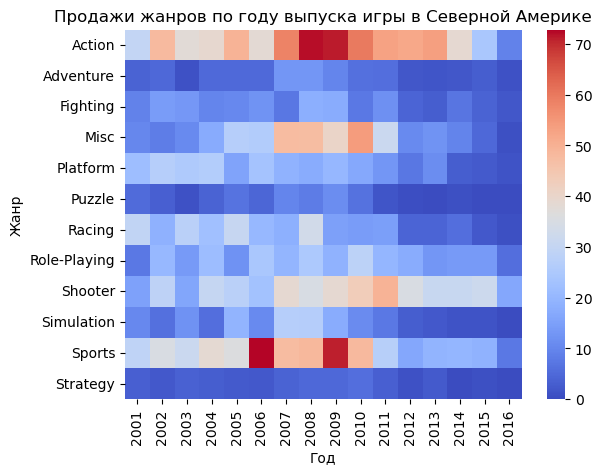

In [91]:
# построим тепловую карту учитывая срез
genre_years = data.query('year_of_release > 2000')\
                  .pivot_table(index = 'genre', columns = 'year_of_release', values = 'na_sales', aggfunc = 'sum')
seaborn.heatmap(genre_years, cmap= 'coolwarm')
plt.ylabel('Жанр')
plt.xlabel('Год')
plt.title('Продажи жанров по году выпуска игры в Северной Америке')
plt.show()

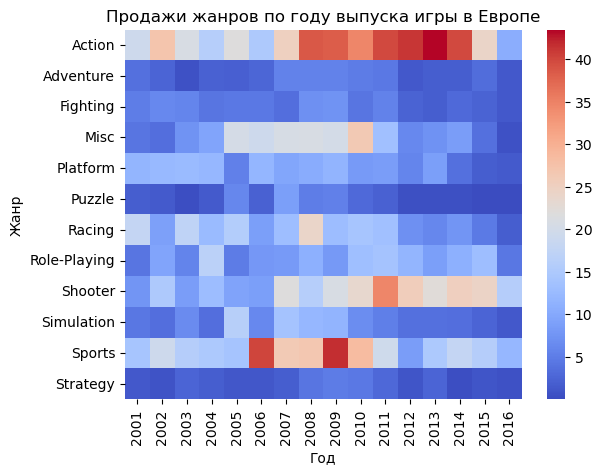

In [92]:
# построим тепловую карту учитывая срез
genre_years = data.query('year_of_release > 2000')\
                  .pivot_table(index = 'genre', columns = 'year_of_release', values = 'eu_sales', aggfunc = 'sum')
seaborn.heatmap(genre_years, cmap= 'coolwarm')
plt.ylabel('Жанр')
plt.xlabel('Год')
plt.title('Продажи жанров по году выпуска игры в Европе')
plt.show()

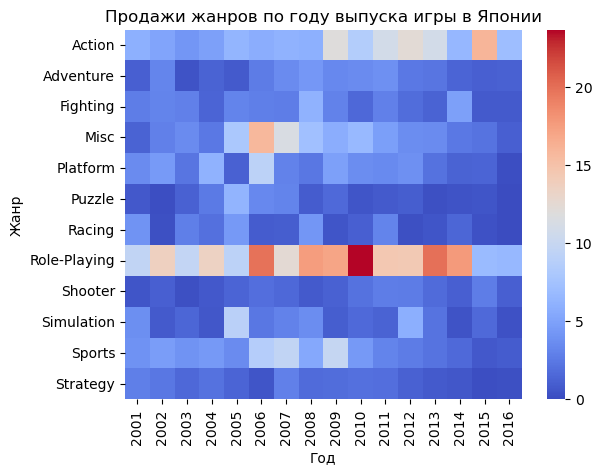

In [93]:
# построим тепловую карту учитывая срез
genre_years = data.query('year_of_release > 2000')\
                  .pivot_table(index = 'genre', columns = 'year_of_release', values = 'jp_sales', aggfunc = 'sum')
seaborn.heatmap(genre_years, cmap= 'coolwarm')
plt.ylabel('Жанр')
plt.xlabel('Год')
plt.title('Продажи жанров по году выпуска игры в Японии')
plt.show()

<div style="border:solid green 2px; padding: 20px">

**Популярные жанры по регионам.**

**Северная Америка и Европа.**

Популярные жанры компьютерных игр совпадают в Северной Америке и Европе, немного отличаются по долям продаж.
Изначально рассматривали выделить топ-5 популярных жанров, но при анализе выявили, что 4 жанра в этих регионах занимают основную долю продаж (в среднем 78%), остальные 8 жанров делят между собой 22% продаж и их влияние не такое значительное.

**Популярные платформы совпали в Северной Америке и Европе.** В данных регионах непопулярны портативные консоли (доля 3DS в среднем 8.3%).

| жанр игры   | доля продаж (%) Северная Америка| доля продаж (%) Европа| 
|:------------|:-------------------------------:|:---------------------:| 
|Action       | 28.8                            | 30.1                  | 
|Shooter      | 25.0                            | 22.4                  |
|Sports       | 14.9                            | 15.4                  |  
|Role-Playing | 10.6                            | 9.4                   |

Если говорить о 5 месте в данных регионах, то в Северной Америке это жанр Misc (доля 6.3%), а в Европе жанр Racing (доля 5,1%).

**Япония.**

Жанровые предпочтения в Японии отличаются от остальных регионов. Особенность жанровых предпочтений в том, что фактически 2 жанра занимают основную долю продаж Role-Playing и Action (доля 65%).

| жанр игры     | доля продаж (%) Япония |
| ------------- | :--------------------: |
| Role-Playing  | 36.3                   |
| Action        | 28.8                   |
| Misc          | 6.5                    |
| Content Cell  | 5.4                    |
| Shooter       | 4.7                    |
            
Важно отметить, что жанр игры Action во всех выборках занимает лидирующие позиции, т.е. он одинаково популярен во всех регионах. Если смотреть на популярность жанров по годам, то жанр Action в Японии стал популярен скорее в последние годы.

Также на графиках можно увидеть, как снижалась в Северной Америке и Европе популярность жанра Sports с 2010 г. и при этом начала расти популярность жанра Shooter.

</div>

### Влияние рейтинга ESRB на продажи в отдельном регионе

<div style="border:solid black 2px; padding: 20px">

Проверим: влияет ли рейтинг ESRB на продажи в отдельном регионе.

Период оставляем актуальный: 2013-2016 гг.

</div>

In [94]:
(data['rating'].isnull().mean() * 100).round() # проверяем наличие и долю пропусков

41.0

In [95]:
# сводная таблица
data_actual_years.pivot_table(index = 'rating_type', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')\
    .sort_values('na_sales', ascending=False)\
    .rename(columns= {'na_sales': 'Продажи в Северной Америке',
                      'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'})

,Продажи в Европе,Продажи в Японии,Продажи в Северной Америке
rating_type,,,
M — Для взрослых (от 17 лет),145.32,14.11,165.21
Нет данных,78.91,85.05,89.42
E — Для всех (от 6 лет),83.36,15.14,79.05
E10+ — Для всех (от 10 лет),42.69,5.89,54.24
T — Подросткам (от 13 лет),41.95,20.59,49.79


In [96]:
# сводная таблица
data_actual_years.query('rating_type != "Нет данных"')\
                 .pivot_table(index = 'rating_type', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')\
                 .sort_values('na_sales', ascending=False)\
                 .rename(columns= {'na_sales': 'Продажи в Северной Америке',
                                   'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'})

,Продажи в Европе,Продажи в Японии,Продажи в Северной Америке
rating_type,,,
M — Для взрослых (от 17 лет),145.32,14.11,165.21
E — Для всех (от 6 лет),83.36,15.14,79.05
E10+ — Для всех (от 10 лет),42.69,5.89,54.24
T — Подросткам (от 13 лет),41.95,20.59,49.79


In [97]:
# выведем доли продаж
data_actual_years.groupby(['rating_type']).agg({'sum'})[['na_sales', 'eu_sales', 'jp_sales']]\
                 .apply(lambda x: 100*x/x.sum()).round(2)

,na_sales,eu_sales,jp_sales
,sum,sum,sum
rating_type,,,
E — Для всех (от 6 лет),18.06,21.25,10.75
E10+ — Для всех (от 10 лет),12.39,10.88,4.18
M — Для взрослых (от 17 лет),37.74,37.05,10.02
T — Подросткам (от 13 лет),11.38,10.70,14.63
Нет данных,20.43,20.12,60.41


In [98]:
# выведем доли продаж учитывая срез
data_actual_years.query('rating_type != "Нет данных"').groupby(['rating_type'])\
                 .agg({'sum'})[['na_sales', 'eu_sales', 'jp_sales']]\
                 .apply(lambda x: 100*x/x.sum()).round(2)

,na_sales,eu_sales,jp_sales
,sum,sum,sum
rating_type,,,
E — Для всех (от 6 лет),22.70,26.61,27.17
E10+ — Для всех (от 10 лет),15.57,13.63,10.57
M — Для взрослых (от 17 лет),47.43,46.38,25.32
T — Подросткам (от 13 лет),14.30,13.39,36.95


In [99]:
# сводная таблица
data_actual_years.query('rating_type == "Нет данных"')\
                 .pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc = 'sum')\
                 .sort_values('total_sales', ascending=False)\
                 .rename(columns= {'total_sales': 'Общие продажи', 'na_sales': 'Продажи в Северной Америке',
                                   'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'})

,Продажи в Европе,Продажи в Японии,Продажи в Северной Америке,Общие продажи
platform,,,,
3DS,18.69,52.40,22.63,97.47
PS4,27.99,6.25,23.77,68.20
PS3,8.66,8.96,8.41,29.52
XOne,8.30,0.05,14.63,25.26
X360,6.20,0.07,12.06,20.10
PSV,1.49,11.75,1.28,15.31
WiiU,3.05,2.52,5.47,11.87
PC,4.02,0.00,0.90,5.22
PSP,0.00,3.00,0.00,3.00


In [100]:
# сгруппируем данные по столбцу 'platform' и 'rating_type'
data_actual_years.query('rating_type != "Нет данных"').query('platform == "3DS" or platform == "PSP" or platform == "PSV"')\
                 .groupby(['platform', 'rating_type'])['jp_sales'].sum()\
                 .reset_index().rename(columns= {'jp_sales': 'Продажи в Японии'})

,platform,rating_type,Продажи в Японии
0,3DS,E — Для всех (от 6 лет),6.94
1,3DS,E10+ — Для всех (от 10 лет),2.39
2,3DS,M — Для взрослых (от 17 лет),1.09
3,3DS,T — Подросткам (от 13 лет),4.99
4,PSP,E — Для всех (от 6 лет),0.14
5,PSP,T — Подросткам (от 13 лет),0.15
6,PSV,E — Для всех (от 6 лет),0.06
7,PSV,E10+ — Для всех (от 10 лет),0.28
8,PSV,M — Для взрослых (от 17 лет),1.42
9,PSV,T — Подросткам (от 13 лет),5.08


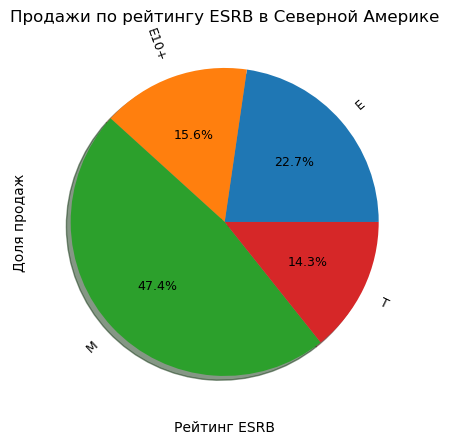

In [101]:
# круговая диаграмма
data_actual_years.groupby('rating')['na_sales'].sum()\
                 .plot(kind = 'pie', shadow = True, figsize = (5,5),
                       autopct = '%1.1f%%', fontsize = 9, rotatelabels = True,
                       title = 'Продажи по рейтингу ESRB в Северной Америке')
plt.ylabel('Доля продаж')
plt.xlabel('Рейтинг ESRB')
plt.show()

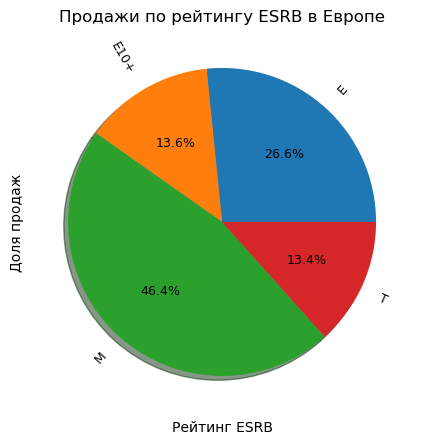

In [102]:
# круговая диаграмма
data_actual_years.groupby('rating')['eu_sales'].sum()\
                 .plot(kind = 'pie', shadow = True, figsize = (5,5),
                       autopct = '%1.1f%%', fontsize = 9, rotatelabels = True,
                       title = 'Продажи по рейтингу ESRB в Европе')
plt.ylabel('Доля продаж')
plt.xlabel('Рейтинг ESRB')
plt.show()

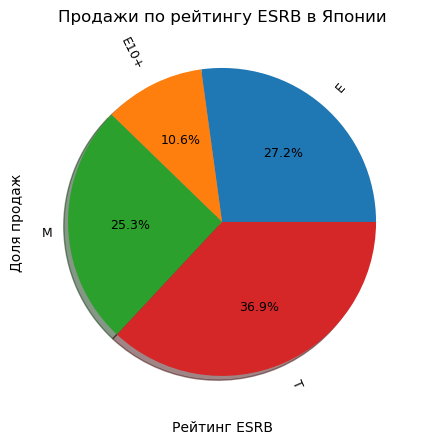

In [103]:
# круговая диаграмма
data_actual_years.groupby('rating')['jp_sales'].sum()\
                 .plot(kind = 'pie', shadow = True, figsize = (5,5),
                       autopct = '%1.1f%%', fontsize = 9, rotatelabels = True,
                       title = 'Продажи по рейтингу ESRB в Японии')
plt.ylabel('Доля продаж')
plt.xlabel('Рейтинг ESRB')
plt.show()

<div style="border:solid green 2px; padding: 20px">

**Влияние рейтинга ESRB на продажи в отдельном регионе.**

**Пропуски в данных.**

Доля пропусков в столбце с рейтингом ESRB составляет 41%.
В Северной Америке и Европе доля продаж игр с отсутствием рейтинга ESRB составляет 20%, в Японии 60%.
Рейтинг отсутствует у всех видов платформ, но большее пропусков рейтинга у портативных игровых консолей 3DS.

**Северная Америка и Европа.**

Влияние рейтинга ESRB на продажи в Северной Америке и Европе схожи.
Есть информация по рейтингу ESRB в этих регионах по 80% проданных копий.
Самые популярные игры с рейтингом M — Для взрослых (от 17 лет). Можно сделать выбор, что игры в Северной Америке и Европе ориентированы на взрослый контент.

| рейтинг ESRB                | доля продаж (%) Северная Америка| доля продаж (%) Европа| 
|:----------------------------|:-------------------------------:|:---------------------:| 
|M — Для взрослых (от 17 лет) | 47.4                            | 46.4                  | 
|E — Для всех (от 6 лет)      | 22.7                            | 26.6                  |
|E10+ — Для всех (от 10 лет)  | 15.6                            | 13.6                  |  
|T — Подросткам (от 13 лет)   | 14.3                            | 13.4                  |


**Япония.**

Есть информация по рейтингу ESRB в этих регионах по 40% проданных копий.

В Японии пользуются популярностью игры с рейтигом T — Подросткам (от 13 лет) и E — Для всех (ранее с 6 лет). Это можно связать с популярностью портативных игровых консолей, у данных платформ это основные виды рейтингов. Так как по 60% проданных копий у нас нет данных по рейтингу, и основную долю в этих пропусках занимают портативные игровые консоли, то можно предположить, что в Японии игры с рейтингом T — Подросткам (от 13 лет) и E — Для всех (ранее с 6 лет) занимают еще большую долю относительно полученных показателей.

Также 25.3% продаж составляет рейтинг M — Для взрослых (от 17 лет).

| жанр игры                    | доля продаж (%) Япония |
| ---------------------------- | :--------------------: |
| T — Подросткам (от 13 лет)   | 36,9                   |
| E — Для всех (от      6 лет) | 27.2                   |
| M — Для взрослых (от 17 лет) | 25.3                   |
| E10+ — Для всех (от 10 лет)  | 10.6                   |


</div>

### Популярные игры по регионам

<div style="border:solid black 2px; padding: 20px">

Определим популярные игры по регионам.

Возьмем 2 периода: 1980-2016 гг. и 2013-2016 гг.

</div>

In [104]:
# сводная таблица весь период Северная Америка
data.pivot_table(index = ['name', 'genre', 'platform'], values = 'na_sales', aggfunc = 'sum')\
    .sort_values('na_sales', ascending=False)\
    .rename(columns= {'na_sales': 'Продажи в Северной Америке'}).head(3)

,,,Продажи в Северной Америке
name,genre,platform,
Wii Sports,Sports,Wii,41.36
Super Mario Bros.,Platform,NES,29.08
Duck Hunt,Shooter,NES,26.93


In [105]:
# сводная таблица 2013 - 2016 гг. Северная Америка
data_actual_years.pivot_table(index = ['name', 'genre', 'platform'], values ='na_sales', aggfunc = 'sum')\
                 .sort_values('na_sales', ascending=False)\
                 .rename(columns= {'na_sales': 'Продажи в Северной Америке 2013 - 2016 гг.'}).head(4)

Продажи в Северной Америке 2013 - 2016 гг.
name                      genre   platform                                            
Grand Theft Auto V        Action  X360                                            9.66
                                  PS3                                             7.02
Call of Duty: Ghosts      Shooter X360                                            6.73
Call of Duty: Black Ops 3 Shooter PS4                                             6.03

In [106]:
# сводная таблица весь период Европа
data.pivot_table(index = ['name', 'genre', 'platform'], values = 'eu_sales', aggfunc = 'sum')\
    .sort_values('eu_sales', ascending=False)\
    .rename(columns= {'eu_sales': 'Продажи в Европе'}).head(3)

,,,Продажи в Европе
name,genre,platform,
Wii Sports,Sports,Wii,28.96
Mario Kart Wii,Racing,Wii,12.76
Nintendogs,Simulation,DS,10.95


In [107]:
# сводная таблица 2013 - 2016 гг. Европа
data_actual_years.pivot_table(index = ['name', 'genre', 'platform'], values = 'eu_sales', aggfunc = 'sum')\
                 .sort_values('eu_sales', ascending=False)\
                 .rename(columns= {'eu_sales': 'Продажи в Европе 2013 - 2016 гг.'}).head(4)

Продажи в Европе 2013 - 2016 гг.
name                      genre   platform                                  
Grand Theft Auto V        Action  PS3                                   9.09
                                  PS4                                   6.31
FIFA 16                   Sports  PS4                                   6.12
Call of Duty: Black Ops 3 Shooter PS4                                   5.86

In [108]:
# сводная таблица
data.pivot_table(index = ['name', 'genre', 'platform'], values = 'jp_sales', aggfunc = 'sum')\
    .sort_values('jp_sales', ascending=False)\
    .rename(columns= {'jp_sales': 'Продажи в Японии'}).head(3)

,,,Продажи в Японии
name,genre,platform,
Pokemon Red/Pokemon Blue,Role-Playing,GB,10.22
Pokemon Gold/Pokemon Silver,Role-Playing,GB,7.20
Super Mario Bros.,Platform,NES,6.81


In [109]:
# сводная таблица
data_actual_years.pivot_table(index = ['name', 'genre', 'platform'], values = 'jp_sales', aggfunc = 'sum')\
                 .sort_values('jp_sales', ascending=False)\
                 .rename(columns= {'jp_sales': 'Продажи в Японии 2013 - 2016 гг.'}).head(3)

,,,Продажи в Японии 2013 - 2016 гг.
name,genre,platform,
Pokemon X/Pokemon Y,Role-Playing,3DS,4.35
Monster Hunter 4,Role-Playing,3DS,3.44
Yokai Watch 2 Ganso/Honke,Role-Playing,3DS,3.18


<div style="border:solid green 2px; padding: 20px">

**Популярные игры по регионам.**

**Северная Америка.** 1980-2016 гг.

| название игры    | жанр      | платформа |  миллионы проданных копий |
|:-----------------|:---------:|:---------:| :------------------------:|
|Wii Sports        | Sports    |Wii        | 41.36                     |
|Super Mario Bros. | Platform  |NES        | 29.08                     |             
|Duck Hunt         | Shooter   |NES        | 26.93                     |            

**Северная Америка.** 2013-2016 гг.

| название игры            | жанр      | платформа |  миллионы проданных копий |
|:-------------------------|:---------:|:---------:| :------------------------:|
|Grand Theft Auto V        | Action    |X360       | 9.66                      |
|Grand Theft Auto V        | Action    |PS3        | 7.02                      |             
|Call of Duty: Ghosts      | Shooter   |X360       | 6.73                      |   
|Call of Duty: Black Ops 3 | Shooter   |PS4        | 6.03                      |

**Европа.** 1980-2016 гг.

| название игры    | жанр      | платформа |  миллионы проданных копий |
|:-----------------|:---------:|:---------:| :------------------------:|
|Wii Sports        | Sports    |Wii        | 28.96                     |
|Mario Kart Wii    | Racing    |Wii        | 12.76                     |             
|Nintendogs        | Simulation|DS         | 10.95                     | 

**Европа.** 2013-2016 гг.

| название игры            | жанр      | платформа |  миллионы проданных копий |
|:-------------------------|:---------:|:---------:| :------------------------:|
|Grand Theft Auto V        | Action    |PS3        | 9.09                      |
|Grand Theft Auto V        | Action    |PS4        | 6.31                      |             
|FIFA 16                   | Sports    |PS4        | 6.12                      |   
|Call of Duty: Black Ops 3 | Shooter   |PS4        | 5.86                      |

**Япония.** 1980-2016 гг.

| название игры              | жанр         | платформа |  миллионы проданных копий |
|:---------------------------|:------------:|:---------:| :------------------------:|
|Pokemon Red/Pokemon Blue    | Role-Playing |GB         | 10.22                     |
|Pokemon Gold/Pokemon Silver | Role-Playing |GB         | 7.20                      |             
|Super Mario Bros.           | Platform     |NES        | 6.81                      |   


**Япония.** 2013-2016 гг.

| название игры              | жанр         | платформа |  миллионы проданных копий |
|:---------------------------|:------------:|:---------:| :------------------------:|
|Pokemon X/Pokemon Y         | Role-Playing |3DS        | 4.35                      |
|Monster Hunter 4            | Role-Playing |3DS        | 3.44                      |             
|Yokai Watch 2 Ganso/Honke   | Role-Playing |3DS        | 3.18                      | 

В Северной Америке и Европе виден переход в продажах от портативных игровых консолей к игровым консолям. Популярные игры менялись вслед за этим переходом.

На современных игровых консолях одна игра может встречаться у разных производителей (Grand Theft Auto V у X360 и PS3).

В Японии популярность портативных игровых консолей не снизилась. Можно говорить о том, что в Японии предпочитают индивидуальные компьютерные игры, когда как в Северной Америке и Европе пользуются популярностью игровые консоли, которые предполагают командную игру.

В Японии не снизилась с годами популярность игры Pokemon, просто обновилась версия.

В актуальный период в Европе в отличии от Северной Америки также пользуется популярностью игра жанра спорт (FIFA 16).

</div>

### Вывод по портрету пользователя каждого региона

<div style="border:solid blue 2px; padding: 20px">

**Портрет пользователя каждого региона.**

**Северная Америка и Европа.**

Портреты пользователей в Северной Америке и Европе очень схожи, поэтому будем рассматривать их вместе.

76% продаж в 2013-2016 гг. приходится на Северную Америку и Европу, соответственно на предпочтения пользователей из этих регионов надо обращать внимание в первую очередь.

Портрет пользователя составлен на данных актуального периода 2013-2016 гг.

***Популярные платформы.***

* **Есть зависимость продаж брендов платформ от регионов.** Пользователи регионов поддерживают свои бренды.
* 
Европа. PlayStation доля продаж 55%. В Европе нет собственного бренда, вероятно пользователи Европы ориентируются на рейтинг критиков или на рекламную активность конкретного бренда.
* Северная Америка. PlayStation доля продаж 40.5%. Xbox доля продаж 40%.
* **Платформы топ-5** совпали в Северной Америке и Европе (PS4, XOne, X360, PS3, 3DS).
* Разница только в том, что в Серверной Америке доля Xbox больше. В данных регионах непопулярны портативные консоли (доля 3DS в среднем 8.3%).

***Популярные жанры игр.***

*  Популярные жанры компьютерных игр совпадают в Северной Америке и Европе, немного отличаются по долям продаж.
* Изначально рассматривали выделить топ-5 популярных жанров, но при анализе выявили, что 4 жанра (Action, Shooter, Sports, Role-Playing) в этих регионах занимают основную долю продаж (в среднем 78%), остальные 8 жанров делят между собой 22% продаж и их влияние не такое значительное.
* Если говорить о 5 месте в данных регионах, то в Северной Америке это жанр Misc (доля 6.3%), а в Европе жанр Racing (доля 5,1%).
* В данных регионах непопулярны портативные консоли (доля 3DS в среднем 8.3%).
* Также на графиках можно увидеть, как снижалась в Северной Америке и Европе популярность жанра Sports с 2010 г. и при этом начала расти популярность жанра Shooter.

***Влияние рейтинга ESRB на продажи.***

* Доля пропусков в столбце с рейтингом ESRB составляет 41%. В Северной Америке и Европе доля продаж игр с отсутствием рейтинга ESRB составляет 20%, в Японии 60%. Рейтинг отсутствует у всех видов платформ, но большее пропусков рейтинга у портативных игровых консолей 3DS.
* Влияние рейтинга ESRB на продажи в Северной Америке и Европе схожи. Есть информация по рейтингу ESRB в этих регионах по 80% проданных копий. Самые популярные игры с рейтингом M — Для взрослых (от 17 лет). Можно сделать выбор, что игры в Северной Америке и Европе ориентированы на взрослый контент.

***Популярные игры.***

* В Северной Америке и Европе виден переход в продажах от портативных игровых консолей к игровым консолям. Популярные игры менялись всем за этим переходом.
* На современных игровых консолях одна игра может встречаться у разных производителей (Grand Theft Auto V у X360 и PS3).
* В актуальный период в Европе в отличии от Северной Америки также пользуется популярностью игра жанра спорт (FIFA 16).

  
***Япония***

Портрет пользователей в Японии кардинально отличается от остальных стран.
   
***Популярные платформы.***

* Как писали выше, **есть зависимость продаж брендов платформ от регионов**. Пользователи регионов поддерживают свои бренды. Nintendo доля продаж 56%, PlayStation доля продаж 43.5%.
* **Платформы топ-5 в Японии** (3DS, PS3, PSV, PS4, WiiU). Рынок Японии отличается тем, что здесь предпочитают портативные игровые консоли. В топ-5 попали сразу 2 портативные консоли 3DS и PSV. Доля продаж игровой консоли прошлого поколения PS3 больше доли модели нового поколения PS4. В Северной Америке и Европе больше доля продаж моделей нового поколения.

***Популярные жанры игр.***

* Жанровые предпочтения в Японии отличаются от остальных регионов. Особенность жанровых предпочтений в том, что фактически 2 жанра занимают основную долю продаж Role-Playing и Action (доля 65%).
* Важно отметить, что жанр игры Action во всех выборках занимает лидирующие позиции, т.е. он одинаково популярен во всех регионах. Если смотреть на популярность жанров по годам, то жанр Action в Японии стал популярен скорее в последние годы.

***Влияние рейтинга ESRB на продажи.***

* Доля пропусков в столбце с рейтингом ESRB составляет 41%. В Японии 60%. Рейтинг отсутствует у всех видов платформ, но большее пропусков рейтинга у портативных игровых консолей 3DS.
* В Японии пользуются популярностью игры с рейтингом T — Подросткам (от 13 лет) и E — Для всех (ранее с 6 лет). Это можно связать с популярностью портативных игровых консолей, у данных платформ это основные виды рейтингов.
* Так как по 60% проданных копий у нас нет данных по рейтингу, и основную долю в этих пропусках занимают портативные игровые консоли, то можно предположить, что в Японии игры с рейтингом T — Подросткам (от 13 лет) и E — Для всех (ранее с 6 лет) занимают еще большую долю относительно полученных показателей.
* Также 25.3% продаж составляет рейтинг M — Для взрослых (от 17 лет).

***Популярные игры.***

* В Японии популярность портативных игровых консолей не снизилась. Можно говорить о том, что в Японии предпочитают индивидуальные компьютерные игры, когда как в Северной Америке и Европе пользуются популярностью игровые консоли, которые предполагают командную игру.
* В Японии не снизилась с годами популярность игры Pokemon, просто обновилась версия.

</div>

[Начало проекта](#Начало_проекта)

<a id="Проверка_гипотез"></a>

## Проверка гипотез

### Гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div style="border:solid black 2px; padding: 20px">

**Гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Гипотеза:

H₀: Средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC.

H1: Средние пользовательские рейтинги платформы Xbox One и средние пользовательские рейтинги платформы PC различаются.

* Для проверки будем использовать данные актуального периода 2013-2016 гг.
* Количество строк XOne и PC различается.
* Укажем параметр equal_var=False, и тест посчитает дисперсии выборок по отдельности.
* Будем сравнивать по средним значениям.
* Применим двухвыборочный t-тест для независимых выборок.
* Не будем указывать 'two-sided', чтобы проверилась двусторонняя гипотеза.
* Удалим строки с пропусками.

</div>

In [110]:
# удалим пропуски
sample_xone = data_actual_years[data_actual_years['platform'] == 'XOne']['user_score'].dropna()
sample_pc = data_actual_years[data_actual_years['platform'] == 'PC']['user_score'].dropna()

In [111]:
print('Количество строк XOne:', len(sample_xone))
print('Количество строк PC:', len(sample_pc))

Количество строк XOne: 182
Количество строк PC: 155


In [112]:
# найдем дисперсию
print('Дисперсия XOne:', sample_xone.var())
print('Дисперсия PC:', sample_pc.var())

Дисперсия XOne: 1.9069968429360702
Дисперсия PC: 3.035892752408884


In [113]:
print(f'Средний рейтинг платформы XOne: {np.mean(sample_xone)}')
print(f'Средний рейтинг платформы PC: {np.mean(sample_pc)}')

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_xone, sample_pc, equal_var=False) # проведем стат. тест 

# выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравним p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг платформы XOne: 6.521428571428572
Средний рейтинг платформы PC: 6.2696774193548395
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">

Не получилось отвергнуть нулевую гипотезу.

Значение p-value показывает: вероятность случайно получить такое или большее различие равна почти 15%, хотя средние рейтинги и не одинаковы.
Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

На имеющихся данных, на уровне значимости 5%, есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

</div>

### Гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные

<div style="border:solid black 2px; padding: 20px">

**Гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные.**

Гипотеза:

H₀: Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports.

H1: Средние пользовательские рейтинги жанра Action и средние пользовательские рейтинги жанра Sports различаются.

* Для проверки будем использовать данные актуального периода 2013-2016 гг.
* Количество строк Action и Sports различается.
* Укажем параметр equal_var=False, и тест посчитает дисперсии выборок по отдельности.
* Будем сравнивать по средним значениям.
* Применим двухвыборочный t-тест для независимых выборок.
* Не будем указывать 'two-sided', чтобы проверилась двусторонняя гипотеза.
* Удалим строки с пропусками.

</div>

In [114]:
# удалим пропуски
sample_action = data_actual_years[data_actual_years['genre'] == 'Action']['user_score'].dropna()
sample_sports = data_actual_years[data_actual_years['genre'] == 'Sports']['user_score'].dropna()

In [115]:
print('Количество строк Action:', len(sample_action))
print('Количество строк Sports:', len(sample_sports))

Количество строк Action: 389
Количество строк Sports: 160


In [116]:
# найдем дисперсию
print('Дисперсия Action:', sample_action.var())
print('Дисперсия Sports:', sample_sports.var())

Дисперсия Action: 1.76936090424827
Дисперсия Sports: 3.1806128144654062


In [117]:
print(f'Средний рейтинг жанра Action: {np.mean(sample_action)}')
print(f'Средний рейтинг жанра Sports: {np.mean(sample_sports)}')

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results2 = st.ttest_ind(sample_action, sample_sports, equal_var=False) # проведем стат. тест 

# выведем на экран получившееся p-значение
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha: # сравним p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг жанра Action: 6.837532133676092
Средний рейтинг жанра Sports: 5.238124999999999
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">

Отвергаем нулевую гипотезу. Видим статистически значимое различие.

На имеющихся данных, на уровне значимости 5%, есть основания сказать, что средние пользовательские рейтинги жанров  Action и Sports разные.

</div>

[Начало проекта](#Начало_проекта)

<a id="Итоги_исследования"></a>

## Итоги исследования

<div style="border:solid blue 2px; padding: 20px">

Для оценки потенциально популярного продукта в индустрии компьютерных игр и планирования рекламных активностей рекомендуем использовать данные ниже.

Путем исследования данных о продажах компьютерных игр интернет-магазина «Стримчик», мы выявили ряд закономерностей, которые определяют успешность игры.

**Частота выпусков игр в разные годы.**
* Мы имеем данные о компьютерных играх с годом выпуска с 1980 г. по 2016 г.
* По графику рост количества выпусков начинается с 1994 г.
* Большинство выпусков было в период 2002-2011 гг.
* Пик выпусков компьютерных игр приходится на 2008 г. и 2009 г.
* С 2011 г. наблюдаем спад выпусков компьютерных игр. Вероятные причины спада:
    * развитие мобильных устройств.
    * компьютерные игры стали более дорогими проектами с точки зрения и финансовых и человеческих ресурсов, соответственно, компании делают ставки не на много бюджетных игр, а на одну прибыльную.
    * когда был бурный рост в индустрии развивались и разные жанры, вероятно после оценки прибыльности новых жанров в текущий момент делают ставку на определенную игру проверенного жанра.
    * в киноиндустрии популярны франшизы, когда производители понимают, что есть группа фанатов, которая принесет им определенную прибыль, вероятно в компьютерных играх также отрабатывают повторно прибыльный проект. Компании заинтересованы удержать клиента, поэтому есть вероятность того, что не выпускают новую игру, а обновляют версию некой популярной игры.
_________________________________________________________________________________________________________________________________________

**Продажи по платформам за весь период.**

* Платформы с наибольшими суммарными продажами за весь период:

| Платформа  | Общие продажи (млн. копий) | Доля продаж (%) |
|:-----------|:--------------------------:|:---------------:|
|PS2         | 1233.56                    |  **13.99**      |
|X360        | 961.24                     |  **10.90**      |
|PS3         | 931.34                     |  **10.57**      |
|Wii         | 891.18                     |  **10.11**      |
|DS          | 802.78                     |  **9.11**       |
|PS          | 727.58                     |  **8.25**       |
|PS4         | 314.14                     |  **3.56**       |

* В среднем платформа существует 11 лет, по продажам активный период работы платформы в среднем 4 года.
* В график попало 4 поколения платформы PS. На данном примере можно наглядно отследить, как появляются новые платформы и исчезают старые.
Разница между запусками платформ в среднем 6 лет, в среднем 4 года платформы разных поколей работают одновременно.
__________________________________________________________________________________________________________________________________________

**Актуальный период для прогноза продаж.**

* Актуальным периодом для прогноза продаж всех платформ можно считать период с 2013 года, с момента запуска платформ последнего поколения PS4 и Xbox One.
* Общий тренд: падение продаж с 2015 г. Так как данные за 2016 г. неполные, то возможно падение было не таким критичным.
__________________________________________________________________________________________________________________________________________

**Потенциально прибыльные платформы (актуальный период).**

* ТОР5 платформ лидеров по продажам (2013-2016 гг.):

| Платформа  | Общие продажи (млн. копий) | Доля продаж (%) |
|:-----------|:--------------------------:|:---------------:|
|PS4         | 314.14                     |  **28.80**      |
|PS3         | 181.43                     |  **16.63**      |
|XOne        | 159.32                     |  **14.60**      |
|3DS         | 143.25                     |  **13.13**      |
|X360        | 136.80                     |  **12.54**      |

* У всех платформ наблюдаем падающий тренд продаж.
* Потенциально прибыльная платформа (бренд) - PlayStation. Доля продаж 48.8%.
__________________________________________________________________________________________________________________________________________

**Распределения (топ-5 платформ лидеров продаж 2013-2016 гг.).**

* Медианные продажи выше у X360 (0.24), ниже у 3DS (0.08).
* Максимальная upper fence у X360 (1.65).
* Самый широкий диапазон продаж млн. копий наблюдается у X360, а наименьший у 3DS.
* Выбросы присутствуют в верхних значениях распределения.
_________________________________________________________________________________________________________________________________________

**Влияние отзывов пользователей и критиков на продажи внутри платформы.**

1. Есть зависимость от оценки критиков и количеством продаж. Чем выше оценка, тем больше продаж.

r>0,30≤0,69 – умеренная положительная связь.

* Коэффициент корреляции PS4 (оценка критиков и продажи млн. копий): 0.41
* Коэффициент корреляции XOne (оценка критиков и продажи млн. копий): 0.42

2. Нет зависимости от оценки пользователей и количеством продаж.

r>-0,01≤-0,29 – слабая отрицательная связь.

* Коэффициент корреляции PS4 (оценка пользователей и продажи млн. копий): -0.03
* Коэффициент корреляции XOne (оценка пользователей и продажи млн. копий): -0.07

Можно предположить, что покупку пользователь делает на основании отзывов критиков, а уже после оставляет свою оценку, которая может быть гораздо ниже ожидаемой. Это также видно по соотношению доли продаж по оценке критиков и доли продаж по оценке пользователей.

Для продаж всех платформ эти закономерности также распространяются. **При покупке компьютерной игры покупатель ориентируется на оценку критиков.**
__________________________________________________________________________________________________________________________________________

**Распределение игр по жанрам.**

* Прибыльные жанры.

| Жанр ТОР5  | Доля продаж (%) Северная Америка| Доля продаж (%) Европа| Доля продаж (%) Япония| Доля продаж (%) Другие| Доля продаж (%) Итого|
|:-----------|:-------------------------------:|:---------------------:|:---------------------:|:---------------------:|:--------------------:|
|Action      | 28.8                            |30.1                   | 28.8                  | 31.0                  | **29.5**             |
|Shooter     | 25.0                            |22.4                   | 4.7                   | 24.0                  | **21.4**             |
|Sports      | 14.9                            |15.4                   | 3.8                   | 16.2                  | **13.8**             |
|Role-Playing| 10.6                            |9.4                    | 36.3                  | 9.6                   | **13.4**             |
|**ИТОГ**    | **79.4**                        |**77.4**               | **73.6**              | **80.8**              | **78.0**             |

* Из 12 жанров отчетности 4 жанра фактически приносят 78% продаж.
* 50% продаж  - это жанры Action (Прохождение уровней для битвы с боссами) и Shooter (Cтрелялка).
* Самые низкие продажи у жанров Strategy — Тактическое управление ресурсами (доля продаж 0,9%) и Puzzle — Решение головоломок (доля продаж 0,3%).
* В таблице с популярными жанрами выделяются доли продаж в Японии, жанры Shooter и Sports не популярны, но при этом самая большая доля продаж жанра Role-Playing. 
* График распределения жанров по годам продемонстрировал, как важно для прогноза брать актуальный период. Если бы мы выбрали данные с более ранним периодом, то жанр Sport вероятно оказался на втором месте по прогнозу продаж, и мы неправильно бы вывели актуальные тренды.
_________________________________________________________________________________________________________________________________________


**Портрет пользователя каждого региона.**


***
<span style="color:green;font-weight:700;font-size:15px">**Северная Америка и Европа.**</span>
***

Портреты пользователей в Северной Америке и Европе очень схожи, поэтому будем рассматривать их вместе.

76% продаж в 2013-2016 гг. приходится на Северную Америку и Европу, соответственно на предпочтения пользователей из этих регионов надо обращать внимание в первую очередь.

Портрет пользователя составлен на данных актуального периода 2013-2016 гг.

***Популярные платформы.***

* **Есть зависимость продаж брендов платформ от регионов.** Пользователи регионов поддерживают свои бренды.
* 
Европа. PlayStation доля продаж 55%. В Европе нет собственного бренда, вероятно пользователи Европы ориентируются на рейтинг критиков или на рекламную активность конкретного бренда.
* Северная Америка. PlayStation доля продаж 40.5%. Xbox доля продаж 40%.
* **Платформы топ-5** совпали в Северной Америке и Европе (PS4, XOne, X360, PS3, 3DS).
* Разница только в том, что в Серверной Америке доля Xbox больше. В данных регионах непопулярны портативные консоли (доля 3DS в среднем 8.3%).

***Популярные жанры игр.***

*  Популярные жанры компьютерных игр совпадают в Северной Америке и Европе, немного отличаются по долям продаж.
* Изначально рассматривали выделить топ-5 популярных жанров, но при анализе выявили, что 4 жанра (Action, Shooter, Sports, Role-Playing) в этих регионах занимают основную долю продаж (в среднем 78%), остальные 8 жанров делят между собой 22% продаж и их влияние не такое значительное.
* Если говорить о 5 месте в данных регионах, то в Северной Америке это жанр Misc (доля 6.3%), а в Европе жанр Racing (доля 5.1%).
* В данных регионах непопулярны портативные консоли (доля 3DS в среднем 8.3%).
* Также на графиках можно увидеть, как снижалась в Северной Америке и Европе популярность жанра Sports с 2010 г. и при этом начала расти популярность жанра Shooter.

***Влияние рейтинга ESRB на продажи.***

* В Северной Америке и Европе доля продаж игр с отсутствием рейтинга ESRB составляет 20% (например, в Японии 60%). Рейтинг отсутствует у всех видов платформ, но большее пропусков рейтинга у портативных игровых консолей 3DS.
* Влияние рейтинга ESRB на продажи в Северной Америке и Европе схожи. Есть информация по рейтингу ESRB в этих регионах по 80% проданных копий. Самые популярные игры с рейтингом M — Для взрослых (от 17 лет). Можно сделать выбор, что игры в Северной Америке и Европе ориентированы на взрослый контент.

***Популярные игры.***

* В Северной Америке и Европе виден переход в продажах от портативных игровых консолей к игровым консолям. Популярные игры менялись вслед за этим переходом.
* На современных игровых консолях одна игра может встречаться у разных производителей (Grand Theft Auto V у X360 и PS3).
* В актуальный период в Европе в отличии от Северной Америки также пользуется популярностью игра жанра спорт (FIFA 16).

***  
<span style="color:green;font-weight:700;font-size:15px">***Япония.***</span>
***

Портрет пользователей в Японии кардинально отличается от остальных стран.
   
***Популярные платформы.***

* Как писали выше, **есть зависимость продаж брендов платформ от регионов**. Пользователи регионов поддерживают свои бренды. Nintendo доля продаж 56%, PlayStation доля продаж 43.5%.
* **Платформы топ-5 в Японии** (3DS, PS3, PSV, PS4, WiiU). Рынок Японии отличается тем, что здесь предпочитают портативные игровые консоли. В топ-5 попали сразу 2 портативные консоли 3DS и PSV. Доля продаж игровой консоли прошлого поколения PS3 больше доли модели нового поколения PS4. В Северной Америке и Европе больше доля продаж моделей нового поколения.

***Популярные жанры игр.***

* Особенность жанровых предпочтений в том, что фактически 2 жанра занимают основную долю продаж Role-Playing и Action (доля 65%).
* Важно отметить, что жанр игры Action во всех выборках занимает лидирующие позиции, т.е. он одинаково популярен во всех регионах. Если смотреть на популярность жанров по годам, то жанр Action в Японии стал популярен скорее в последние годы.

***Влияние рейтинга ESRB на продажи.***

* Доля пропусков в столбце с рейтингом ESRB составляет в Японии 60%. Рейтинг отсутствует у всех видов платформ, но большее пропусков рейтинга у портативных игровых консолей 3DS.
* В Японии пользуются популярностью игры с рейтингом T — Подросткам (от 13 лет) и E — Для всех (ранее с 6 лет). Это можно связать с популярностью портативных игровых консолей, у данных платформ это основные виды рейтингов.
* Так как по 60% проданных копий у нас нет данных по рейтингу, и основную долю в этих пропусках занимают портативные игровые консоли, то можно предположить, что в Японии игры с рейтингом T — Подросткам (от 13 лет) и E — Для всех (ранее с 6 лет) занимают еще большую долю относительно полученных показателей.
* Также 25.3% продаж составляет рейтинг M — Для взрослых (от 17 лет).

***Популярные игры.***

* В Японии популярны портативные игровые консоли. Можно говорить о том, что в Японии предпочитают индивидуальные компьютерные игры, когда как в Северной Америке и Европе пользуются популярностью игровые консоли, которые предполагают командную игру.
* В Японии не снизилась с годами популярность игры Pokemon, просто обновилась версия.
_________________________________________________________________________________________________________________________________________

**Проверили гипотезы и установили, что все гипотезы подтвердились.**

***1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

На имеющихся данных, на уровне значимости 5%, есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

***2. Средние пользовательские рейтинги жанров Action и Sports разные.***

На имеющихся данных, на уровне значимости 5%, есть основания сказать, что средние пользовательские рейтинги жанров Action и Sports разные.
_________________________________________________________________________________________________________________________________________

**ВАЖНО.**

Примерно с 2011 года в связи с улучшение скорости интернета, возможностью онлайн оплаты в любую страну, и другими факторами резко выросли покупки игр через официальные онлайн платформы, такие как: steam от valve, origin от electronic arts, PS store от Sony, Microsoft store от Microsoft и другие.

Издатели игр перестали бояться ухода клиентов из точек продаж (розничных магазинов и интернет-магазинов) и осознали, что продажа онлайн - новая ветвь бизнеса, которую необходимо развивать.

Издатели стали охотно заманивать игроков на цифровые платформы, где игрок может купить любую игру официально, в любое время, без риска заражения вирусом, с быстрой онлайн оплатой.

Это существенно повлияло на изменение каналов распространения игр. И соответственно это повлияло на аналитику рынка игр, теперь для получения полной картины по трендам для прогноза продаж желательно иметь агрегированные данные с топовых онлайн платформ.

</div>